## **LATAR BELAKANG**
Airbnb telah berkembang menjadi platform utama untuk penyewaan properti jangka pendek, terutama di kota-kota besar seperti Bangkok. Faktor-faktor yang mempengaruhi harga sewa di Airbnb sangat bervariasi, mencakup lokasi properti, jenis akomodasi, fasilitas yang ditawarkan, serta permintaan dan penawaran di pasar lokal. Di Bangkok, sebuah pusat pariwisata yang dinamis dengan variasi lingkungan yang luas, keberadaan lokasi strategis dekat dengan objek wisata utama atau akses mudah ke transportasi umum dapat meningkatkan nilai sewa. Jenis properti, seperti apartemen mewah atau kamar pribadi sederhana, juga menentukan harga. Selain itu, tambahan fasilitas seperti WiFi, kolam renang, atau keamanan 24 jam dapat mempengaruhi persepsi nilai oleh penyewa dan berujung pada penyesuaian harga oleh pemilik.

Untuk stakeholder Airbnb, pemilik properti, dan pengguna, memahami faktor-faktor ini penting dalam mengoptimalkan pengalaman sewa dan mengatur strategi harga. Analisis data dari platform dapat membantu mengidentifikasi tren dan pola yang mempengaruhi keputusan harga, memungkinkan pemilik untuk menyesuaikan strategi pemasaran mereka dan pengguna untuk membuat keputusan sewa yang lebih informasi. Dengan demikian, keterlibatan semua pihak dalam memahami dan menanggapi dinamika pasar ini menjadi kunci untuk memaksimalkan potensi penghasilan dan kepuasan pelanggan di Airbnb Bangkok.

## **PERNYATAAN PERMASALAHAN**
Di kota Bangkok yang beragam dan dinamis, harga sewa di Airbnb dipengaruhi oleh berbagai faktor. Perusahaan Airbnb, dalam usaha meningkatkan efektivitas penetapan harga dan strategi pasar, membutuhkan pemahaman yang lebih mendalam tentang bagaimana faktor faktor ini berinteraksi dan mempengaruhi harga sewa. Oleh karena itu, penting untuk menganalisis hubungan tersebut untuk membantu Airbnb,user dan pemilik properti menetapkan harga yang tidak hanya kompetitif tetapi juga sesuai dengan nilai pasar setempat.

Sebagai seorang data analyst, saya akan menggali lebih dalam untuk menjawab pertanyaan berikut:

**Faktor - faktor apa saja yang mempengaruhi harga sewa properti di Bangkok?**

#### **TUJUAN ANALISIS**
Tujuan utama dari analisis ini adalah:
Mampu memberikan informasi terkait apa saja yang mempengaruhi harga sewa properti yang ada di platform Airbnb yang ada di Bangkok, Thailand.

#### **STAKEHOLDER YANG TERLIBAT**
Insight dari penelitian ini akan bermanfaat bagi beberapa pihak, termasuk:
- **Airbnb**: Untuk menyempurnakan strategi penetapan harga dan penawaran mereka di Bangkok.
- **Pemilik Properti**: Untuk menyesuaikan dan mengoptimalkan harga sewa mereka berdasarkan analisis data yang mendalam.
- **Pengguna Airbnb**: Akan mendapatkan informasi tentang bagaimana variabel tipe kamar dan lokasi mempengaruhi harga sewa, membantu mereka dalam membuat keputusan pemesanan yang lebih informasi.

## **DATA**
Untuk menjawab pertanyaan diatas, saya akan menganalisis data Airbnb Bangkok yang sudah dikumpulkan oleh perusahaan. 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import statsmodels.api as sm
from scipy.stats import kstest

warnings.filterwarnings("ignore")

Dataset ini mengandung informasi mengenai deskripsi dan status pendaftaran ruangan yang tersedia untuk disewakan di Airbnb di Bangkok. Terdapat 17 kolom dalam dataset 'Airbnb Listings Bangkok':

* Unnamed: 0 : Indeks dataset (penyimpanan yang salah pada dataset sebelumnya)
* id : ID unik untuk setiap pendaftaran properti
* name : Deskripsi nama dari setiap properti yang tersedia
* host_id : ID unik untuk setiap tuan rumah
* host_name : Nama dari tiap tuan rumah, umumnya hanya nama depan
* neighbourhood : Nama distrik di Kota Bangkok
* latitude : Titik garis lintang untuk lokasi proyeksi
* longitude : Titik garis bujur untuk lokasi proyeksi
* room_type : Jenis ruangan yang tersedia (seluruh rumah/apartemen, kamar pribadi, kamar bersama, dan hotel)
* price : Harga sewa harian dalam mata uang lokal
* minimum_nights : Jumlah minimum malam yang harus dipesan
* number_of_reviews : Jumlah ulasan yang diterima oleh setiap pendaftaran
* last_review : Tanggal ulasan terakhir
* reviews_per_month : Rata-rata jumlah ulasan per bulan
* calculated_host_listings_count : Jumlah pendaftaran yang dimiliki oleh tuan rumah dalam wilayah geografis tertentu
* availability_365 : Ketersediaan pendaftaran dalam 365 hari ke depan
* number_of_reviews_ltm : Jumlah ulasan dalam 12 bulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset 'Airbnb Listings Bangkok'.

In [51]:
csv_path = "..\data\Airbnb Listings Bangkok.csv"
data_airbnb = pd.read_csv(csv_path)
display(data_airbnb.head(),data_airbnb.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## **PEMAHAMAN DAN PEMBERSIHAN DATA**
Sebelum kami melakukan analisis lebih lanjut, penting untuk memahami dataset 'Airbnb Listings Bangkok' melalui tahapan pemahaman data. Proses ini akan membantu kami mengidentifikasi anomali-anomali yang mungkin ada dalam dataset dan perlu ditangani selama tahap pembersihan data. Setiap tindakan yang diambil untuk menangani anomali, seperti nilai yang hilang, outlier, format data yang tidak sesuai, dan/atau duplikat data, akan didasarkan pada justifikasi yang melibatkan pengetahuan domain dan analisis statistik.

Sebelum kita melanjutkan analisis lebih lanjut, langkah pertama adalah menghilangkan kolom 'Unnamed: 0' yang berisi indeks karena ada kesalahan saat menyimpan dataset sebelumnya.

In [52]:
data_airbnb.drop(columns='Unnamed: 0', inplace=True)

Selanjutnya, mari kita melihat ringkasan informasi yang terdapat dalam dataset 'Daftar Airbnb Bangkok'.

In [53]:
# Menampilkan informasi mengenai dataset df
data_airbnb.info()
print(f'\nJumlah Baris dan Kolom dalam dataset df ini adalah {data_airbnb.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [54]:
# Melakukan check data apakah data tersebut ada nan, unik, negative, nol dan duplicate.
pd.DataFrame({
    'Nama kolom': data_airbnb.columns.values,
    'data_type': data_airbnb.dtypes.values,
    'null_value(%)': data_airbnb.isna().mean()*100,
    'n_unique': data_airbnb.nunique().values,
    'neg_value': [True if data_airbnb[col].dtype == int and (data_airbnb[col] < 0).any() else False for col in data_airbnb.columns],
    '0_value': [True if data_airbnb[col].dtype == int and (data_airbnb[col] == 0).any() else False for col in data_airbnb.columns],
    'duplicate' : data_airbnb.duplicated().sum()})

,Nama kolom,data_type,null_value(%),n_unique,neg_value,0_value,duplicate
id,id,int64,0.000000,15854,False,False,0
name,name,object,0.050460,14794,False,False,0
host_id,host_id,int64,0.000000,6659,False,False,0
host_name,host_name,object,0.006308,5312,False,False,0
neighbourhood,neighbourhood,object,0.000000,50,False,False,0
latitude,latitude,float64,0.000000,9606,False,False,0
longitude,longitude,float64,0.000000,10224,False,False,0
room_type,room_type,object,0.000000,4,False,False,0
price,price,int64,0.000000,3040,False,False,0
minimum_nights,minimum_nights,int64,0.000000,86,False,False,0


In [55]:
# Menampilkan ringkasan statistik untuk kolom numerik dan kolom objek dalam dataset df
display(data_airbnb.describe(), data_airbnb.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [56]:
pd.set_option('display.max_colwidth', None)
#menampilkan unique pada tiap kolom 
list_Item = []
for col in data_airbnb.columns:
    list_Item.append([col, data_airbnb[col].nunique(), data_airbnb[col].unique()])

Tabel_unik = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Sampel Unique'],
                          data=list_Item)
Tabel_unik

,Nama Kolom,Jumlah Nilai Unique,Sampel Unique
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2

Secara umum, berikut adalah beberapa observasi terkait dengan dataset 'Airbnb Listings Bangkok':

* Dataset ini terdiri dari 16 kolom dan 15854 baris.
* Beberapa kolom, seperti `name`, `host_name`, `last_review`, dan `reviews_per_month` memiliki entri yang kosong, yang ditandai dengan nilai NaN.
* Kolom `last_review` yang seharusnya berisi tanggal, ternyata memiliki tipe data objek, yang mungkin sebaiknya diubah menjadi tipe data *datetime* untuk konsistensi.
* Saat melakukan analisis statistik deskriptif dengan menggunakan fungsi df.describe(), ditemukan nilai minimum yang tidak relevan dalam kolom `price`, yaitu 0. Hal ini tidak masuk akal karena tidak mungkin menyewakan ruangan dengan harga 0.
* Untuk `name` terdapat beberapa logo atau character yang tidak sesuai sehingga harus dihapuskan. 

### Missing Value

In [57]:
#Cek persentase missing value di tiap kolom
data_airbnb.isna().mean()*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

Bisa dilihat untuk kolom missing value ada empat kolom yang memiliki missing value yaitu `name`, `host_name`, `last_review`, dan `reviews_per_month`. Mari kita lihat persebaran data untuk kolom missing value ini dalam bentuk visualisasinya. 

<Axes: >

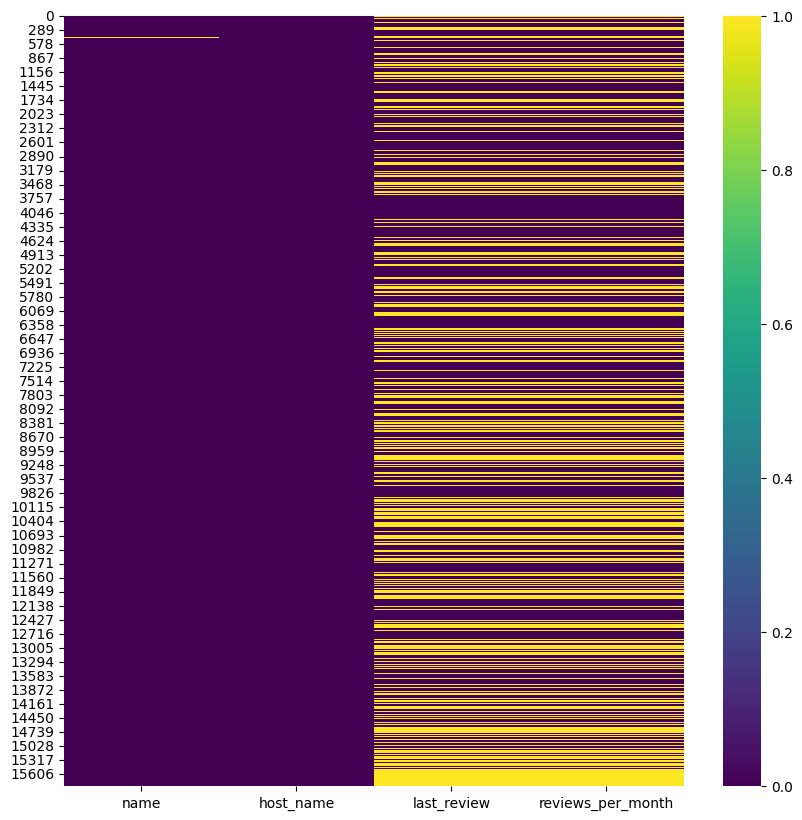

In [58]:
# Melihat sebaran data dengan menggunakan heatmap untuk memahami pola data 
plt.figure(figsize=(10,10))
sns.heatmap(data_airbnb[['name','host_name','last_review', 'reviews_per_month']].isna(),cmap='viridis')

Berdasarkan hasil visualisasi diatas bisa dapat kita maknai :
* Jumlah data yang hilang di kolom `name` dan `hosting_name` sangat sedikit, kurang dari 0.06%.
* Bahwa data yang hilang dalam kolom `last_review` dan `reviews_per_month` memiliki proporsi yang tinggi yaitu setiap kolom tersebut mencapai 36.52%.
* Bisa dilihat dari visualisasi bahwa jika data di kolom `last_review` kosong, kemungkinan besar data di kolom `reviews_per_month` juga kosong.

In [59]:
# Cek data missing value pada kolom 'name' 
data_airbnb[data_airbnb['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Bisa kita lihat pada kolom `name` yang missing value ada 8 data. Ini seharusnya tidak terjadi karena setiap host atau yang memiliki properti seharusnya dalam mendaftarkan ke Airbnb harus memberikan nama propertinya. Sehingga untuk mengatasi permasalahan ini, akan mengisi data yang hilang dengan melihat pola dari kolom `name` yang sudah terisi. 

In [60]:
# melihat data kolom name yang sudah tersisi
pattern = r'\b(at)\b'
data_airbnb['name'] = data_airbnb['name'].fillna('')
filter_data_airbnb = data_airbnb[data_airbnb['name'].str.contains(pattern)]
filter_data_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0
36,169285,Stay at the ROARING RATCHADA!,806600,Frances,Huai Khwang,13.78118,100.58349,Private room,1316,1,0,NaN,NaN,1,365,0
62,313459,One Bed Room at Sukumvit 50 Bangkok,1611711,Nichapat,Khlong Toei,13.71513,100.56830,Private room,2226,1,0,NaN,NaN,1,364,0
75,385979,Monthly rent 2Beds/2Baths quiet APT at BTS,1681901,Pornpan,Khlong San,13.71905,100.50414,Entire home/apt,1747,30,80,2020-01-28,0.62,1,330,0


Dengan melihat pola data ini, saya melihat pada indeks yang ke 4 dengan kolom `name` yang bernama **Suite Room 3 at MetroPoint** bisa saya asumsikan bahwa sebelum kata **at** tersebut merupakan tipe room dan setelah at merupakan daerah lingkungannya. Sehingga untuk mengisi kolom `name` yang kosong bisa diisi menggunakan kolom `room_type` dan `neighbourhood` untuk mendeskripsikan secara umum pproperti pemilik host tersebut. 

In [61]:
# Fungsi untuk mengisi data di kolom 'name' yang kosong 
data_airbnb['name'] = data_airbnb['name'].fillna(data_airbnb['room_type'] + 'at' + data_airbnb['neighbourhood'])

In [62]:
data_airbnb.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Yang selanjutnya terkait dengan missing value yang ada pada `host_name` yang memiliki nilai NaN berjumlah 1 data. Itu tidak saya drop ada insight yang bisa di ambil dari data tersebut karena dalam kolom `last_review` dan `reviews_per_month` ada nilainya yang berarti bahwa tempat tersebut sudah pernah disewakan kepada konsumen. 

In [63]:
data_airbnb[data_airbnb['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Sehingga saya akan mengisinya dengan 'Unknown' yang menjadi pilihan lebih informatif daripada menggunakan string kosong (''). Alasan untuk menggunakan 'Unknown' adalah agar pengguna data dapat dengan jelas memahami bahwa nilai tersebut sebenarnya tidak tersedia atau tidak diketahui, bukan hanya karena kesalahan input atau masalah teknis lainnya.

In [64]:
#Mengisi missing value pada kolom 'host_name' dengan Unknown.
data_airbnb['host_name'].fillna('Unknown', inplace=True)

In [65]:
data_airbnb.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Untuk kolom `host_name`sudah kosong missing valuenya kita lanjut ke kolom `last_review` dan `reviews_per_months` yang memiliki pola missing value yang sama. Karena missing value pada kolom `last_review` dan `reviews_per_months` memiliki pola yang sama. Sehingga untuk kolom `reviews_per_months` saya isi dengan nilai 0. Sedangkan dengan kolom `last_review` akan saya drop karena disitu menunjukkan tanggal ulasan terakhir yang missing value dan tidak termasuk analisis saya. 

In [66]:
# Mengisi dengan 0 pada kolom reviews_per_month
data_airbnb['reviews_per_month'].fillna(0, inplace=True)

# Menghapus kolom last_review
data_airbnb.drop(columns=['last_review'], inplace=True)
data_airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Untuk missing value sudah bersih sehingga bisa lanjut ke tahap selanjutnya. 

### Normalisasi Data 
Disini kita akan menghapus karakter atau logo dalam kolom nama. Alasannya karena membantu meningkatkan kualitas dan konsistensi data, yang penting untuk analisis yang akurat. Karakter tersebut sering kali tidak memberikan informasi tambahan dan dapat menyebabkan kebingungan atau masalah saat melakukan pengolahan data lebih lanjut, seperti pencarian atau pengelompokan data.

In [67]:
# Fungsi ini digunakan untuk membersihkan karakter khusus dan hanya menyimpan huruf, angka, spasi, tulisan Thailand dan Tulisan Cina
def clean_name(text):
    # Menghapus special karakter 
    clean_text = re.sub(r'[^\w\sก-๙一-鿕]', '', text)
    # Menghapus spasi yang berlebih 
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

# Melakukan penerapan fungsi clean_name pada kolom 'name'
data_airbnb['name'] = data_airbnb['name'].astype(str).apply(clean_name)

# Menampilkan hasil yang sudah dibersihkan
display(data_airbnb['name'].sample(10))

12473    Charming Apt Near Terminal21 Asok Rooftop Pool Gym
11860                                     Gedkanokapartment
3316       The Tempo Grand condo 20 steps to BTS Wutthakart
5782              อพาร์ทเม้นท์ 1 ห้องนอนแสนสบายและสะดวกสบาย
3150                 New roomPool viewNear Siriraj Hospital
11306       Asoke BTS simple luxury pool view longterm stay
742                               private condo next to bts
2867         New private onebedroom suite near BTS Phyathai
12434                                  1 Bedroom Ekkamai 22
8637        everything new FACILITY all CLEANphromphong5MIN
Name: name, dtype: object

### Data Formatting

In [68]:
# Melakukan cek tipe data per kolom dataset 
data_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

Pada kolom `price` seharusnya menggunakan tipe data **float** karena harga bisa mencakup nilai desimal. Misalnya, jika harga dirata-ratakan atau dihitung dengan menggabungkan beberapa nilai, menghasilkan harga yang memiliki pecahan. Dengan menggunakan float, kita dapat mempertahankan keakuratan ini tanpa membulatkan ke bilangan bulat terdekat, yang bisa penting dalam analisis keuangan atau ketika melakukan perhitungan yang membutuhkan presisi tinggi. Maka sekarang kita akan mengganti tipe data pada kolom tersebut. 

In [69]:
data_airbnb['price'] = data_airbnb['price'].astype(float)
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15854 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  float64
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  reviews_per_month               15854 non-null  float64
 12  calculated_host_listings_count  

### Data Duplicate

In [70]:
# Menghitung jumlah total baris duplikat
jml_duplicate = len(data_airbnb[data_airbnb.duplicated()])

jml_duplicate

0

In [71]:
# Menghitung jumlah total baris duplikat
jml_duplicate = len(data_airbnb[data_airbnb.duplicated()])

jml_duplicate

0

In [72]:
# Melakukan pengecekan jumlah dataset Airbnb
len(data_airbnb)

15854

Tidak ada data yang sama di dalam dataset ini, hal tersebut terlihat dari fakta bahwa jumlah nomor identifikasi `id` yang unik sesuai dengan jumlah baris data yang ada. Maka kita selanjutnya menangani outlier

### Outliers

Saya akan melihat persebaran data untuk kolom yang terkait dengan analisis saya. 

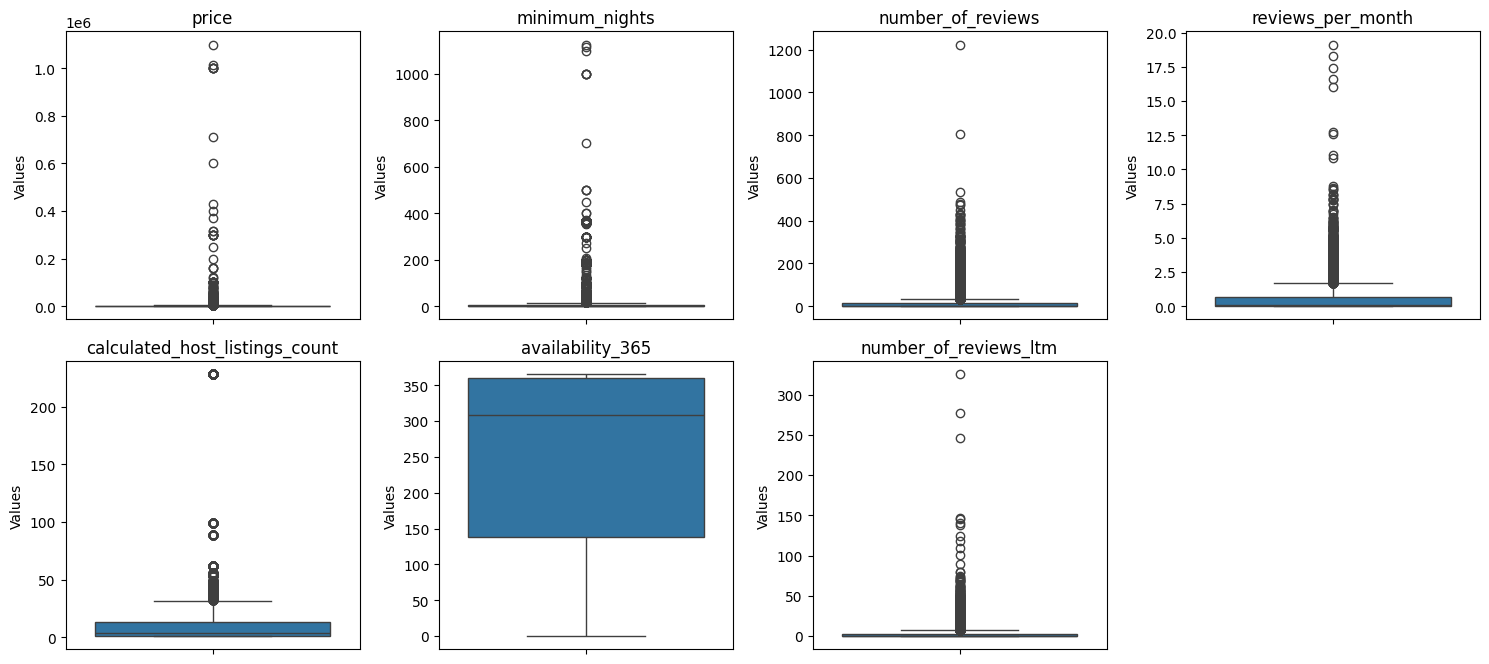

In [73]:
# Menentukan kolom numerik
numerical_columns = ['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=data_airbnb, y=column)
    plt.title(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

Bisa kita lihat bahwa ada 6 kolom yang memiliki outliers maka saya akan mengidentifikasi outliers tersebut dengan IQR.

In [74]:
# Fungsi untuk menghitung dan mengidentifikasi outlier berdasarkan IQR
def calculate_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mengidentifikasi outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

# Membuat dictionary untuk menyimpan hasil
outlier_results = {}

# Melakukan perhitungan outlier untuk semua kolom numerik
numerical_columns = ['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']
for column in numerical_columns:
    lb, ub, outliers = calculate_iqr_outliers(data_airbnb, column)
    outlier_results[column] = {
        "Lower Bound": lb,
        "Upper Bound": ub,
        "Jumlah Outliers": len(outliers)
    }

# Membuat DataFrame dari hasil outlier
outlier_df = pd.DataFrame(outlier_results)
outlier_df = outlier_df.transpose()
outlier_df_sorted = data_airbnb.sort_values(by="minimum_nights", ascending=True)

# Menampilkan DataFrame
display(outlier_df, outlier_df_sorted.head())


,Lower Bound,Upper Bound,Jumlah Outliers
price,-1393.500,4722.500,1403.0
minimum_nights,-8.000,16.000,3168.0
number_of_reviews,-19.500,32.500,2240.0
reviews_per_month,-1.005,1.675,1471.0
calculated_host_listings_count,-17.000,31.000,1832.0
availability_365,-195.000,693.000,0.0
number_of_reviews_ltm,-4.500,7.500,2219.0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75296,100.54082,Private room,1214.0,1,0,0.00,14,365,0
6518,30734307,14 Male Dormitory Room,228535635,Pornchai,Phra Nakhon,13.75767,100.49826,Shared room,550.0,1,0,0.00,62,180,0
6519,30734373,14 Male Dormitory Room,228535635,Pornchai,Phra Nakhon,13.75748,100.49713,Shared room,550.0,1,0,0.00,62,180,0
6520,30737826,14 Male Dormitory Room,228535635,Pornchai,Phra Nakhon,13.75920,100.49902,Shared room,550.0,1,0,0.00,62,180,0
12238,545202154314986108,only 200 m from BTS Onnut 1 bedroom,43087260,Modcho,Phra Khanong,13.70413,100.60383,Entire home/apt,800.0,1,15,1.51,1,237,15


Berikut penjelasan untuk tabel tersebut:

1. **Price**: Outlier diidentifikasi dengan batas bawah -1393.50 dan batas atas 4722.50. Terdapat 1403 outlier yang dihitung, menandakan bahwa ada sejumlah harga sewa yang sangat tinggi atau sangat rendah dibandingkan dengan rentang 'normal' yang ditentukan oleh IQR. Maka saya akan melakukan analisis terpisah untuk outliers karena melihat jumlah data yang besar untuk outlier.

2. **Minimum Nights**: Dengan batas bawah -8.00 dan batas atas 16.00, terdapat 3168 outlier. Nilai batas bawah yang negatif tidak masuk akal dalam konteks malam minimum, sehingga bisa diabaikan, dan outlier ini mungkin menunjukkan properti yang memerlukan masa inap yang sangat singkat atau sangat panjang, yang tidak umum dalam praktik penyewaan Airbnb biasa. 

3. **Number of Reviews**: Batasnya adalah -19.50 hingga 32.50 dengan 2240 outlier. Ini mengindikasikan adanya properti dengan jumlah ulasan yang sangat tinggi atau sangat rendah. Mengingat ulasan bisa jadi berkumpul seiring waktu dan bervariasi tergantung pada lamanya properti terdaftar, outlier ini mungkin tidak perlu diubah karena dapat memberikan informasi berharga tentang popularitas atau keterbaruan properti.

4. **Reviews per Month**: Dengan batas -1.29 dan 2.47, ada 693 outlier. Review per bulan bisa berfluktuasi tergantung pada berbagai faktor, termasuk musiman atau peristiwa khusus. Untuk Outliers ini saya biarkan saja karena ini merupakan review dari user kepada tempat penyewaan. 

5. **Calculated Host Listings Count**: Batasnya adalah -17.00 hingga 31.00, dengan 1832 outlier yang ditemukan. Outlier ini mungkin menunjukkan host yang memiliki banyak properti, dan keberadaannya bisa relevan untuk memahami operasi host yang berskala besar atau perusahaan manajemen properti.

6. **Availability 365**: Tidak ada outlier yang ditemukan dengan batas bawah -195.00 dan batas atas 693.00. Variabel ini tampaknya tidak memiliki nilai yang secara signifikan menyimpang dari nilai tengah, yang mungkin menunjukkan bahwa kebanyakan properti memiliki pola ketersediaan serupa sepanjang tahun.

7. **Number of Reviews Ltm**: Terdapat 2219 outlier dengan batas bawah -4.50 dan batas atas 7.50. Variabel ini, mirip dengan jumlah ulasan, bisa sangat bervariasi dan outlier mungkin mencerminkan properti yang baru-baru ini populer atau aktivitas promosi yang berhasil.

#### Penanganan Outlier 


1. `minimum_nights` kita melihat apakah didalam kolom tersebut ada yang 0 atau minus. 

In [75]:
data_airbnb[data_airbnb['minimum_nights'] <= 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Ternyata tidak ada maka selanjutnya menangani terkait dengan kolom `price`

2. `price` untuk kolom ini kita akan melihat apakah ada nilai price yang 0. 

In [76]:
data_airbnb.shape

(15854, 15)

In [77]:
# Melihat data yang nilai price nya adalah 0 
data_airbnb[data_airbnb['price'] == 0 ]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0.0,1,0,0.0,1,0,0


Ternyata hanya ada satu data yang nilainya 0 sehingga lebih baik dihapus saja karena tidak mempengaruhi data lainnya. 

In [78]:
data_airbnb.drop(data_airbnb[data_airbnb['price'] == 0].index, inplace=True)

In [79]:
data_airbnb.shape

(15853, 15)

Jumlah data sudah berubah setelah melakukan penhapusan. Selanjutnya saya akan melihat berapa jumlah untuk lower bond dan upper bond pada kolom price ini.

In [80]:
# Melakukan identifikasi jumlah dan persenan outliers price 
# Memanggil fungsi calculate_iqr_outliers untuk kolom "price"
lower_bound_price, upper_bound_price, outliers_price = calculate_iqr_outliers(data_airbnb, 'price')
jumlah_outlier = len(outliers_price)
total_data = len(data_airbnb['price'])
presentase_outlier = (jumlah_outlier/total_data)* 100
jumlah_upperbonds = len(data_airbnb[data_airbnb['price'] > ub])
jumlah_lowerbonds = len(data_airbnb[data_airbnb['price'] < lb])

print(f'''Total jumlah data yang outlier yaitu {jumlah_outlier}
Presentase untuk data yang outlier yaitu {presentase_outlier}
Jumlah outlier diatas upperbonds yaitu {jumlah_upperbonds}
Jumlah outlier dibawah lowerbonds yaitu {jumlah_lowerbonds}
''')

Total jumlah data yang outlier yaitu 1403
Presentase untuk data yang outlier yaitu 8.85005992556614
Jumlah outlier diatas upperbonds yaitu 15853
Jumlah outlier dibawah lowerbonds yaitu 0



Dengan jumlah outlier yang seperti ini, saya akan melakukan analisis terpisah. Hal ini dilakukan untuk outliers yang mencerminkan properti yang unik yang bisa saya katakan sebagai harga yang premium karena semua outliernya berada diatas *upperbonds*. Sehingga mendapatkan pemahaman yang lebih akurat dan terinci tentang pasar untuk mayoritas properti Airbnb yang lebih standar, serta memahami kondisi pasar untuk properti yang mahal. 

Jadi dengan ini saya akan membuat analisis menjadi dua yaitu 
* **Analisis Harga Reguler**: Fokus pada data tanpa outlier untuk mendapatkan faktor apa saja yang mempengaruhi harga reguler.
* **Analisis Harga Premium**: Menganalisis data outlier untuk memahami faktor apa saja yang mempengaruhi harga premium atau tinggi.

### Membuat Kategori Berdasarkan District

Menurut sumber pada [artikel penelitian 2021](https://www.mdpi.com/2071-1050/13/20/11426), wilayah di Kota Bangkok dapat dikelompokkan menjadi tiga bagian yang berbeda, yaitu inner zone, middle zone, dan outer zone. Berdasarkan artikel tersebut, inner zone itu merupakan pusat bisnis, middle zone area komersial sekunder yang mendukung pertumbuhan dari pengembangan kota, outer zone yang didominasi bidang pertanian.  Pemisahan ini akan sangat bermanfaat untuk memudahkan analisis yang akan dilakukan di masa mendatang.

In [81]:

data_airbnb['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [82]:
def label(neighbourhood):
    if neighbourhood in ['Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner Zone'
    elif neighbourhood in['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle Zone'
    elif neighbourhood in['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer Zone'
    else :
        return 'Tidak Tahu'

data_airbnb['city_zone'] = data_airbnb['neighbourhood'].apply(label)

In [83]:
data_airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city_zone
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905.0,3,65,0.50,2,353,0,Inner Zone
1,27979,Easy going landlordeasy place,120541,Emy,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,0.00,2,358,0,Middle Zone
2,28745,modernstyle apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0,0.00,1,365,0,Middle Zone
3,35780,Spacious one bedroom at The Kris Condo Bldg 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286.0,7,2,0.03,1,323,1,Inner Zone
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905.0,1,0,0.00,3,365,0,Middle Zone


### Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [84]:
listItem = []
for col in data_airbnb.columns :
    listItem.append([col, data_airbnb[col].dtype, data_airbnb[col].isna().sum(),
                    data_airbnb[col].nunique(), list(data_airbnb[col].drop_duplicates().sample(2).values)]);

data_airbnbDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(data_airbnb.shape)
data_airbnbDesc

(15853, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15853,"[7424353, 16251476]"
1,name,object,0,14740,"[Hotel Papa Bangkok Duo Twin Room, iSanook Suite 34 sqm 3]"
2,host_id,int64,0,6658,"[180264356, 33535856]"
3,host_name,object,0,5312,"[Sasakamol, Meimei]"
4,neighbourhood,object,0,50,"[Khan Na Yao, Thon buri]"
5,latitude,float64,0,9606,"[13.7181, 13.70731]"
6,longitude,float64,0,10224,"[100.5694391118206, 100.61344]"
7,room_type,object,0,4,"[Entire home/apt, Hotel room]"
8,price,float64,0,3039,"[4586.0, 2026.0]"
9,minimum_nights,int64,0,86,"[55, 10]"


In [85]:
# Melakukan Download data baru 
data_airbnb.to_csv("Clean Data Airbnb.csv",index=False)

## **DATA ANALISIS**

Sebelum itu saya akan memisahkan dataset yang harga reguler dan harga premium untuk memudahkan dalam melakukan analisis sesuai dengan keputusan analisis yang saya buat.

In [86]:
Q1 = data_airbnb['price'].quantile(0.25)
Q3 = data_airbnb['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Memisahkan dataset yang harga normal dan harga premium 
data_reguler = data_airbnb[(data_airbnb['price'] >= lower_bound) & (data_airbnb['price']<= upper_bound)]
data_premium = data_airbnb[(data_airbnb['price'] > upper_bound)]

# Melakukan summary untuk harga normal dan harga premium 
print('Summary Harga Reguler')
display(data_reguler.describe())
print('Summary Harga Premium')
display(data_premium.describe())

Summary Harga Reguler


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.445000e+04,1.445000e+04,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000,14450.000000
mean,1.578202e+17,1.528044e+08,13.745595,100.560005,1563.720761,15.383253,17.091142,0.524210,14.046367,243.214048,3.517647
std,2.946717e+17,1.312414e+08,0.043897,0.051574,942.560147,49.163431,41.493117,0.960015,30.969817,125.472691,8.981637
min,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.087722e+07,4.026024e+07,13.719401,100.529153,862.250000,1.000000,0.000000,0.000000,1.000000,136.000000,0.000000
50%,3.494914e+07,1.211513e+08,13.738910,100.561550,1300.000000,1.000000,2.000000,0.100000,4.000000,305.000000,0.000000
75%,5.250185e+07,2.354447e+08,13.760358,100.585880,2000.000000,7.000000,14.000000,0.690000,13.000000,360.000000,3.000000
max,7.907510e+17,4.926659e+08,13.953540,100.923440,4720.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Summary Harga Premium


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.403000e+03,1.403000e+03,1403.000000,1403.000000,1.403000e+03,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,1.592828e+17,1.673621e+08,13.740501,100.558843,2.025496e+04,14.366358,12.165360,0.433820,12.284391,256.547398,3.111903
std,2.940546e+17,1.374889e+08,0.032607,0.043518,8.199725e+04,65.471524,29.748969,0.870762,21.745013,128.895510,8.217767
min,6.604600e+04,1.323220e+05,13.605310,100.378990,4.725000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.370795e+07,3.752855e+07,13.724695,100.537095,5.500000e+03,1.000000,0.000000,0.000000,1.000000,156.500000,0.000000
50%,3.670775e+07,1.502090e+08,13.736650,100.561120,7.340000e+03,1.000000,1.000000,0.030000,5.000000,334.000000,0.000000
75%,5.337008e+07,2.631774e+08,13.749030,100.580120,1.056450e+04,2.000000,9.000000,0.470000,14.000000,364.000000,1.000000
max,7.908162e+17,4.924704e+08,13.950740,100.838510,1.100000e+06,999.000000,344.000000,8.140000,228.000000,365.000000,118.000000


Berikut ini adalah ringkasan statistik dan distribusi harga untuk dua harga yang sudah dipisahkan :
1. Reguler Priced Listings:
* Count: 14,451 listings.
* Mean: Rata-rata harga adalah 1,563.61 Baht.
* Standard Deviation: Deviasi standar adalah 942.62 Baht.
* Min/Max: Harga terendah adalah 278 Baht dan tertinggi adalah 4,720 Baht.
* Median: 1,300 Baht.
2. Premium Priced Listings:
* Count: 1,403 listings.
* Mean: Rata-rata harga adalah 20,254.96 Baht.
* Standard Deviation: Deviasi standar sangat tinggi pada 81,997.25 Baht, menunjukkan variasi harga yang luas dalam segmen ini.
* Min/Max: Harga terendah adalah 4,725 Baht dan tertinggi mencapai 1,100,000 Baht.
* Median: 7,340 Baht.

saya akan melakukan analisis selanjutnya untuk kedua segmen tersebut. 
1. **Analisis Harga Reguler** = saya akan mengeksplorasi faktor-faktor yang mungkin mempengaruhi harga normal. 
2. **Analisis Harga Premium** = Sedangkan untuk harga yang tinggi, saya akan mengeksplorasi faktor-faktor yang mungkin mempengaruhi tinggnya harga ini. 

### **Melihat Pengaruh Variabel-Variabel Kategorikal dan Numerik terhadap Harga Reguler dan Harga Premium**

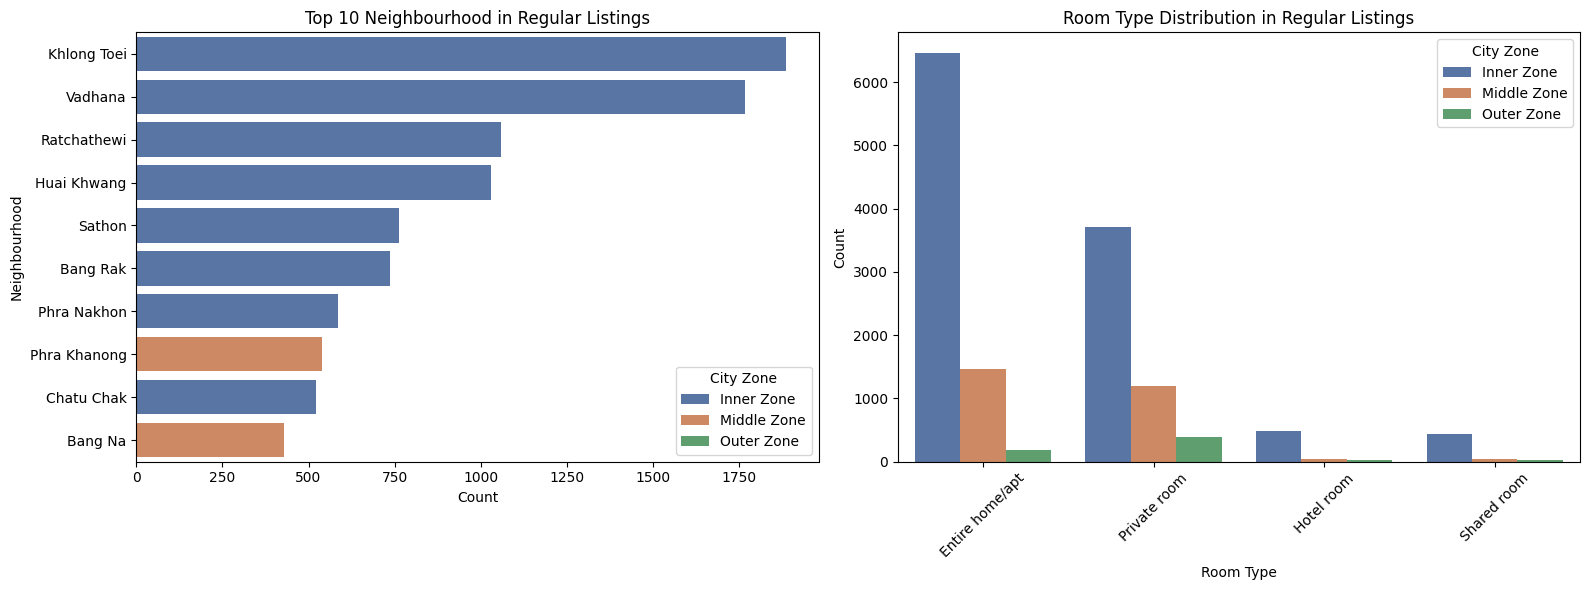

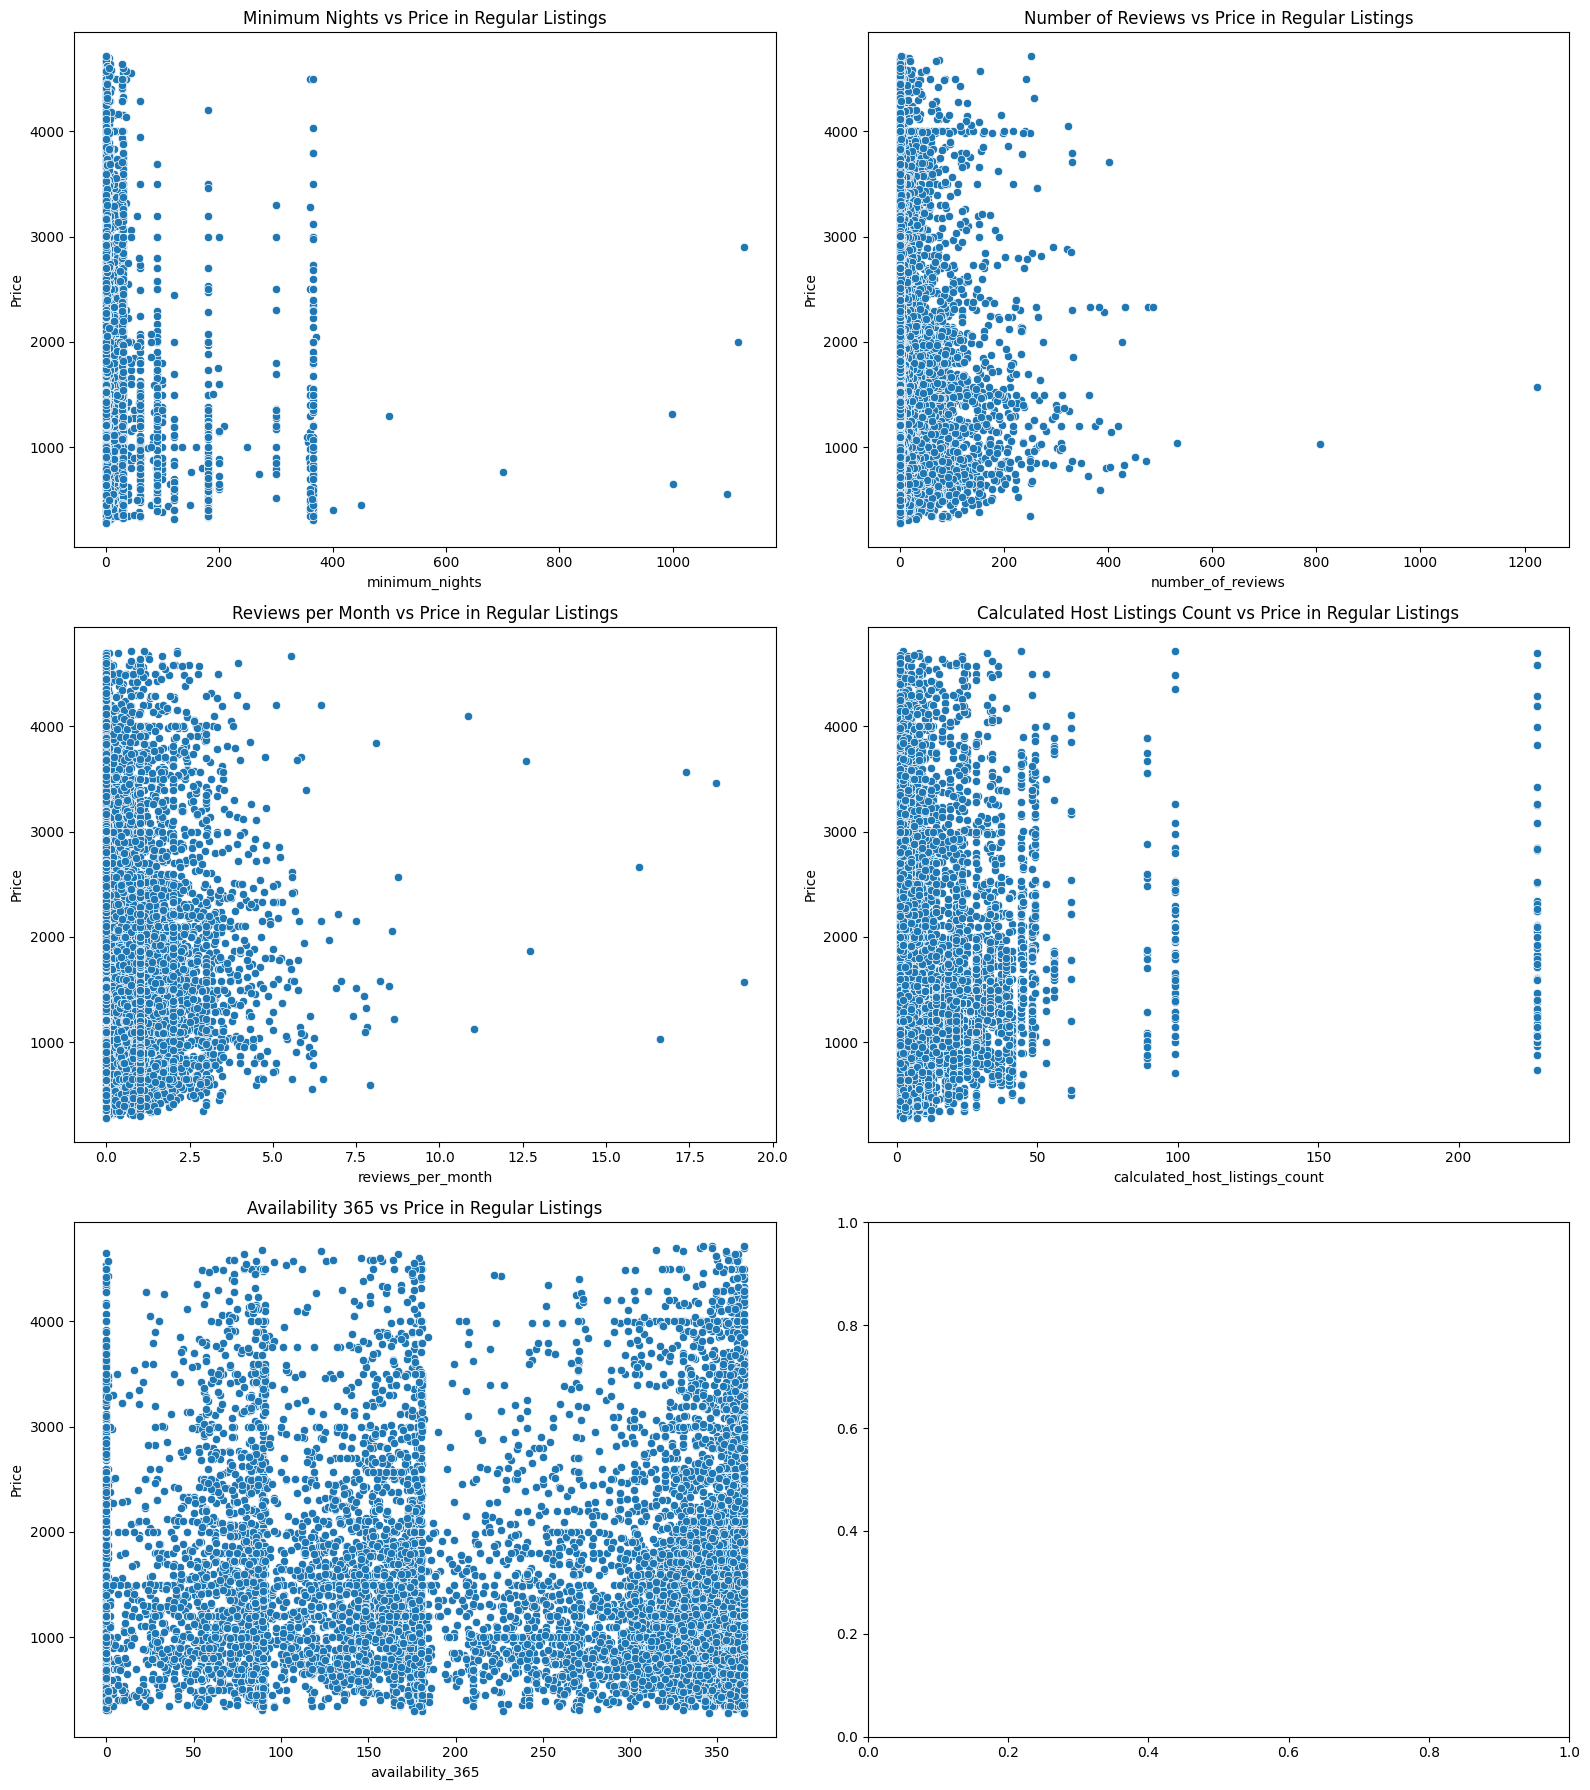

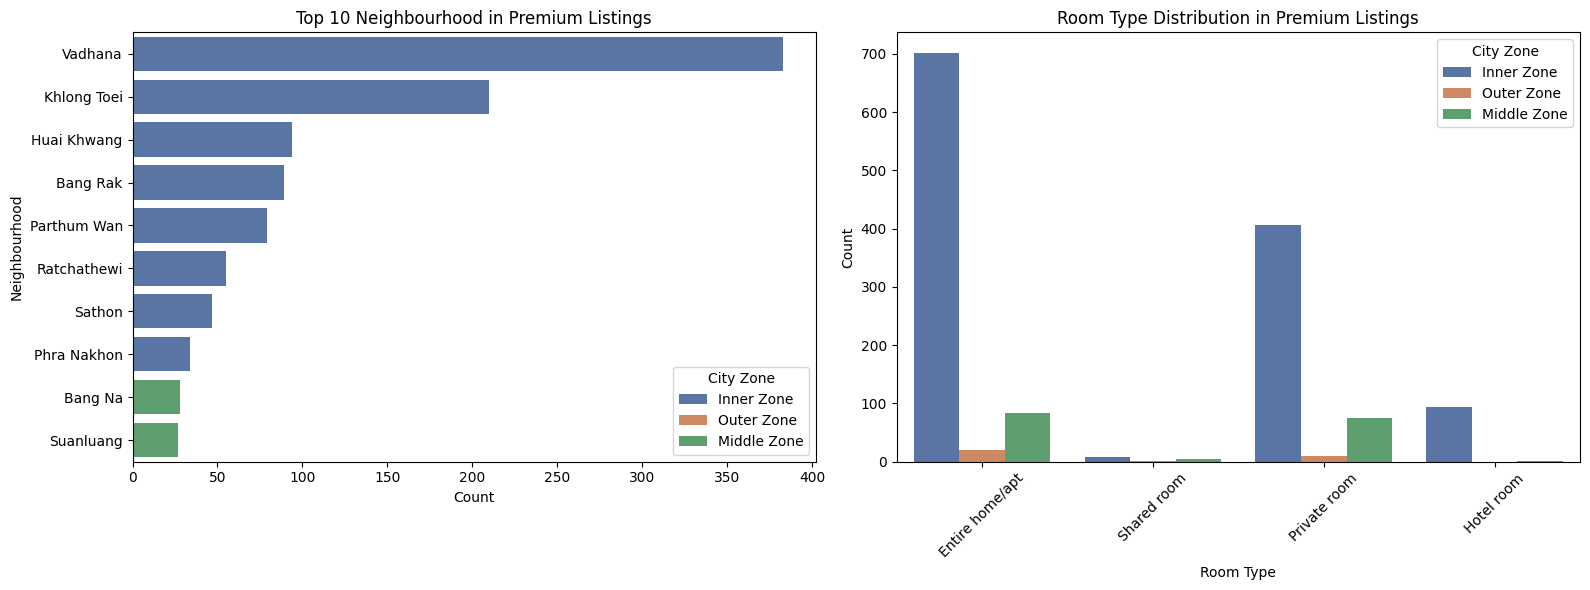

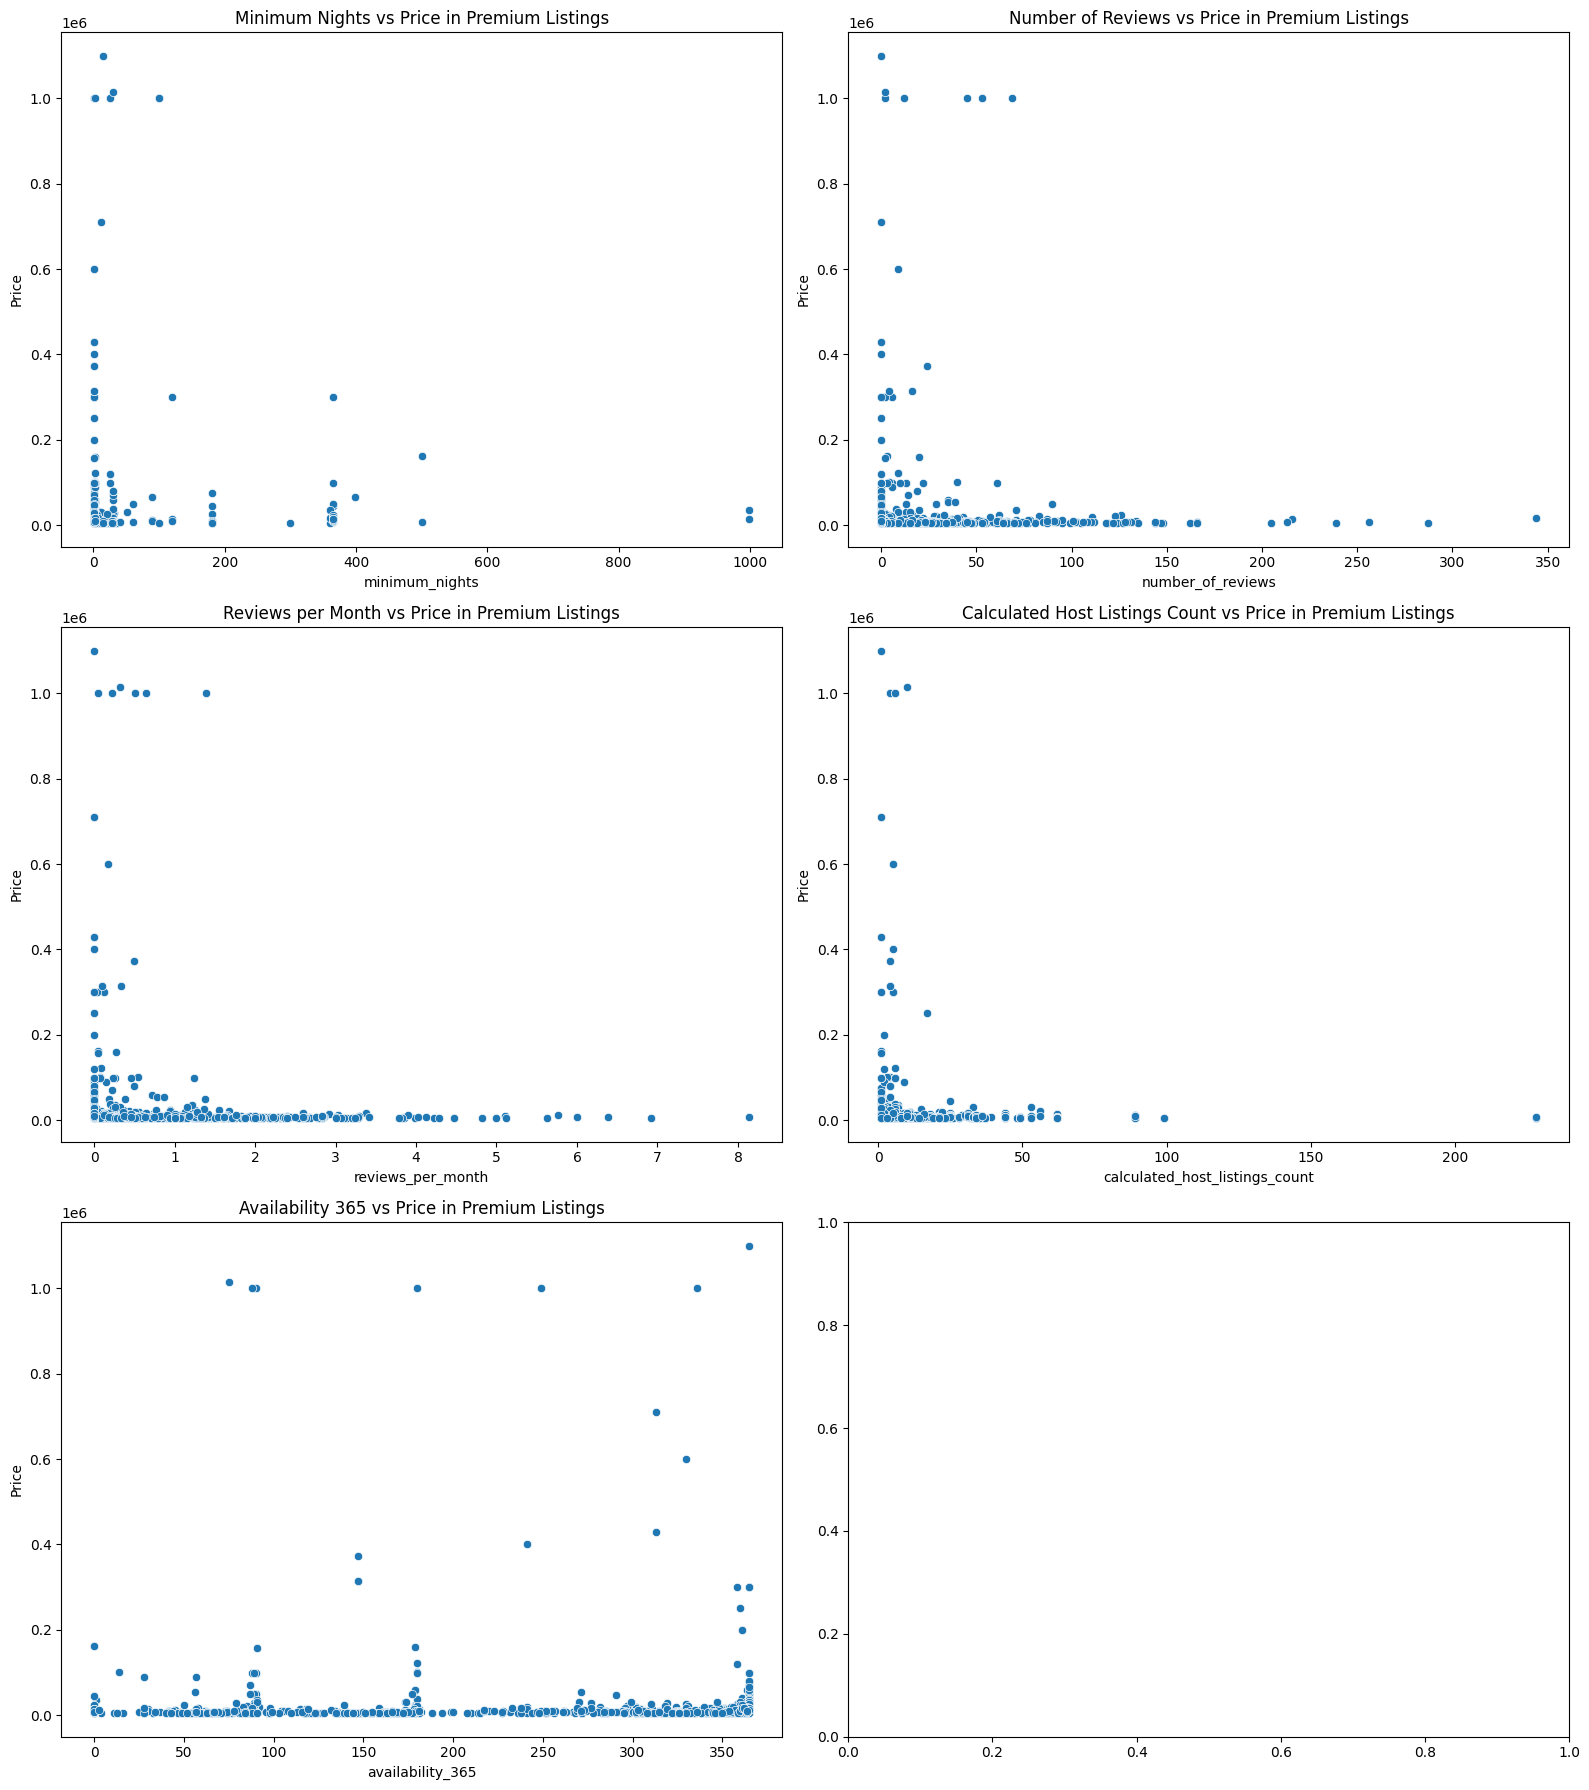

In [87]:
# Menyiapkan data dan visualisasi untuk variabel kategorikal 'neighbourhood' dan 'room_type'
def plot_categorical(data, title_suffix):
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    order_neighbourhood = data['neighbourhood'].value_counts().index[:10]  # 10 top neighbourhood
    sns.countplot(y=data['neighbourhood'], hue=data['city_zone'], order=order_neighbourhood, palette='deep')
    plt.title(f'Top 10 Neighbourhood in {title_suffix}')
    plt.xlabel('Count')
    plt.ylabel('Neighbourhood')
    plt.legend(title='City Zone')

    plt.subplot(1, 2, 2)
    sns.countplot(data=data, x='room_type', hue=data['city_zone'], palette='deep')
    plt.title(f'Room Type Distribution in {title_suffix}')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='City Zone')

    plt.tight_layout()
    plt.show()

# Menyiapkan data dan visualisasi untuk variabel numerik
def plot_numerical(data, title_suffix):
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    variables = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
    titles = ['Minimum Nights', 'Number of Reviews', 'Reviews per Month', 'Calculated Host Listings Count', 'Availability 365']

    for i, var in enumerate(variables):
        sns.scatterplot(ax=axs[i // 2, i % 2], x=data[var], y=data['price'],palette='Set1')
        axs[i // 2, i % 2].set_title(f'{titles[i]} vs Price in {title_suffix}')
        axs[i // 2, i % 2].set_xlabel(var)
        axs[i // 2, i % 2].set_ylabel('Price')

    plt.tight_layout()
    plt.show()

# Visualisasi untuk data reguler
plot_categorical(data_reguler, 'Regular Listings')
plot_numerical(data_reguler, 'Regular Listings')

# Visualisasi untuk data premium
plot_categorical(data_premium, 'Premium Listings')
plot_numerical(data_premium, 'Premium Listings')


### Visualisasi Data: Distribusi dan Pengaruh Variabel

#### Data Reguler
1. **Kategorikal (Neighbourhood dan Room Type)**
Grafik ini menunjukkan jumlah listing Airbnb di 10 lingkungan teratas (neighbourhood) di Bangkok untuk 'Regular Listings', yang kemungkinan berarti akomodasi non-premium atau standar. Di sini kita melihat bahwa Khlong Toei dan Vadhana adalah dua lingkungan dengan jumlah listing tertinggi. Lingkungan ini mungkin populer atau memiliki permintaan yang tinggi karena lokasinya yang strategis atau penawaran yang menarik. Warna yang berbeda pada batang menunjukkan zona kota di mana lingkungan tersebut berada—biru untuk Inner Zone, oranye untuk Middle Zone, dan hijau untuk Outer Zone. Dari ini, kita dapat menyimpulkan bahwa sebagian besar listing top berada di Inner Zone, yang menandakan popularitas atau aksesibilitas area tersebut yang lebih baik dibandingkan zona lain.
2. **Numerikal (Variabel vs Harga)**: 
Pada grafik kedua, kita melihat distribusi tipe kamar yang tersedia untuk 'Regular Listings'. 'Entire home/apt' adalah yang paling banyak tersedia, diikuti oleh 'Private room', dengan 'Hotel room' dan 'Shared room' memiliki jumlah yang jauh lebih sedikit. Ini menunjukkan bahwa para pelancong atau penyewa di Bangkok cenderung lebih memilih menyewa seluruh rumah atau apartemen, atau setidaknya kamar pribadi, dibandingkan dengan kamar hotel atau kamar bersama. Sama seperti grafik sebelumnya, warna batang menunjukkan zona kota—menunjukkan bahwa untuk semua tipe kamar, penawaran terbanyak terletak di Inner Zone.

#### Data Premium
1. **Kategorikal**: Dalam grafik pertama, 'Top 10 Neighbourhood in Premium Listings', kita melihat peringkat 10 lingkungan teratas berdasarkan jumlah listing Airbnb premium yang tersedia. Lingkungan Vadhana menduduki puncak daftar, diikuti oleh Khlong Toei dan Huai Khwang. Warna bar menandakan zona kota di mana lingkungan ini berada: biru mewakili Inner Zone, hijau untuk Middle Zone, dan oranye untuk Outer Zone. Dari sini kita bisa melihat bahwa lingkungan premium terbanyak berada di Inner Zone Bangkok, menunjukkan bahwa zona ini mungkin menawarkan fasilitas dan aksesibilitas yang lebih baik, membuatnya lebih menarik bagi listing premium.
2. **Numerikal**: Pada grafik kedua, 'Room Type Distribution in Premium Listings', kita melihat bahwa 'Entire home/apt' merupakan jenis kamar yang paling banyak ditawarkan di listing premium, yang menunjukkan bahwa pelancong atau penyewa yang mencari pengalaman premium lebih memilih privasi dan kenyamanan sebuah rumah atau apartemen penuh. 'Private room' adalah tipe kamar berikutnya yang paling populer, sedangkan 'Shared room' dan 'Hotel room' kurang populer dalam kategori premium. Ini menegaskan preferensi untuk privasi dan eksklusivitas dalam listing premium.


### **Analisis Lanjutan**

Saya menggunakan analisis statistik inferensial untuk lebih mendalam memahami pengaruh berbagai faktor terhadap harga sewa. Namun sebelu itu saya akan melakukan uji Kolmogorov-Smirnov, karena ukuran data yang dianalisis besar serta uji ini tidak sensitif terhadap outliers.

Testing price for Regular Data:


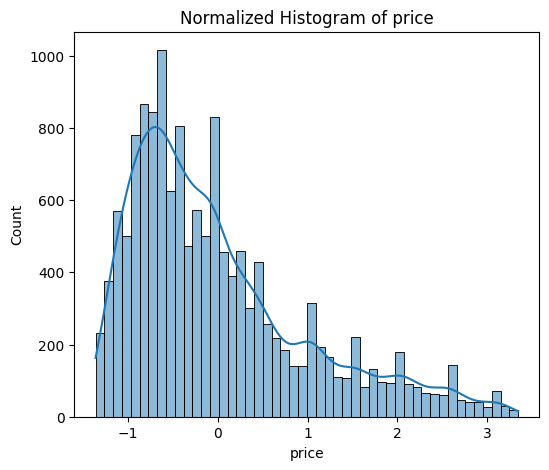

<Figure size 600x500 with 0 Axes>

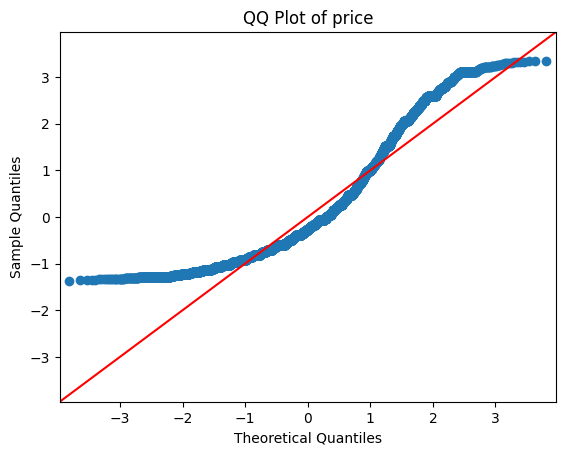

KS Test for price: Not Normal (p-value: 0.0000)
Testing price for Premium Data:


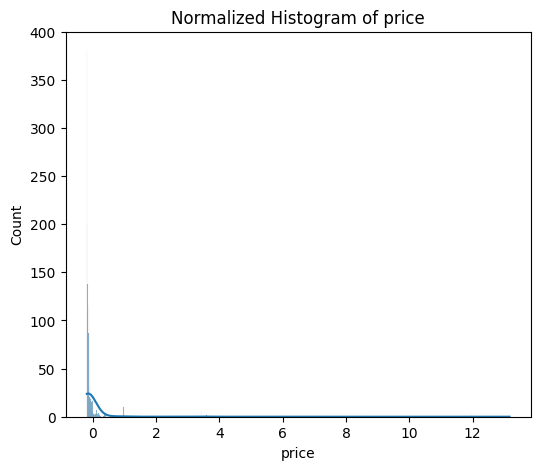

<Figure size 600x500 with 0 Axes>

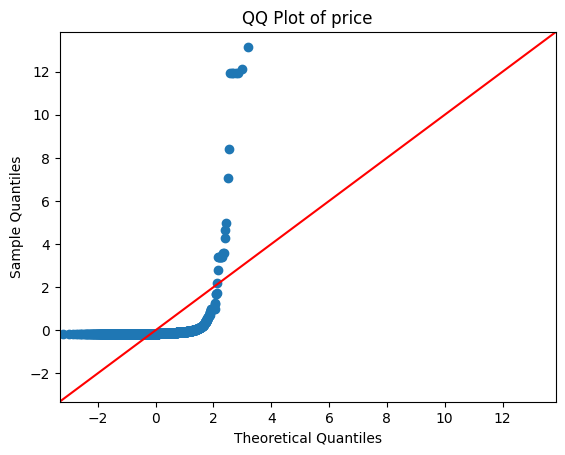

KS Test for price: Not Normal (p-value: 0.0000)
Testing minimum_nights for Regular Data:


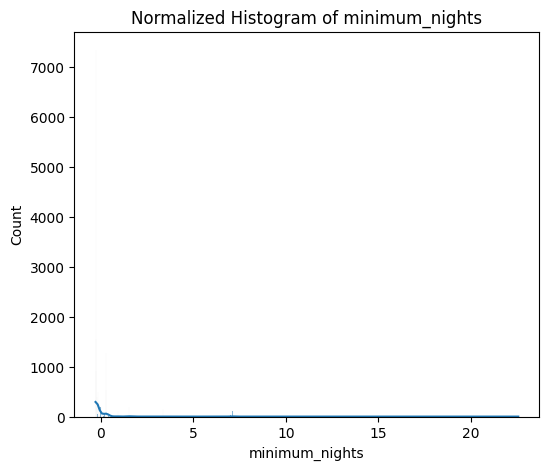

<Figure size 600x500 with 0 Axes>

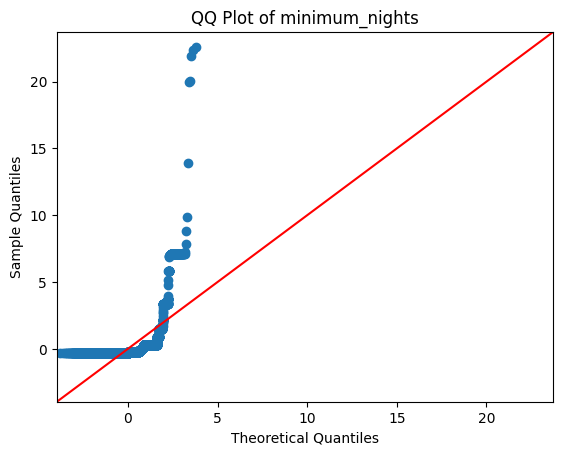

KS Test for minimum_nights: Not Normal (p-value: 0.0000)
Testing minimum_nights for Premium Data:


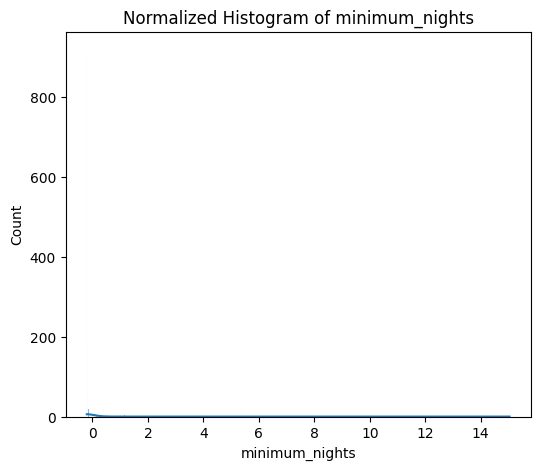

<Figure size 600x500 with 0 Axes>

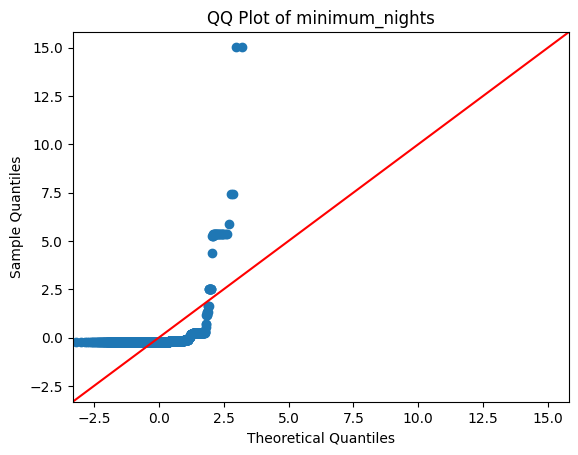

KS Test for minimum_nights: Not Normal (p-value: 0.0000)
Testing number_of_reviews for Regular Data:


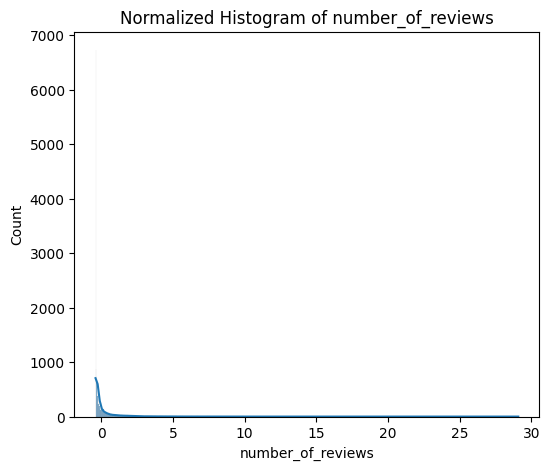

<Figure size 600x500 with 0 Axes>

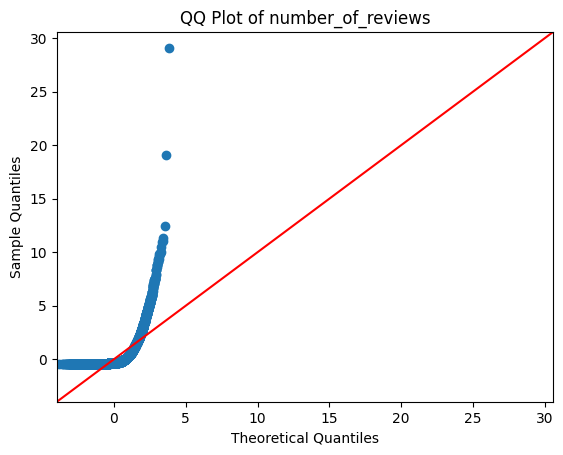

KS Test for number_of_reviews: Not Normal (p-value: 0.0000)
Testing number_of_reviews for Premium Data:


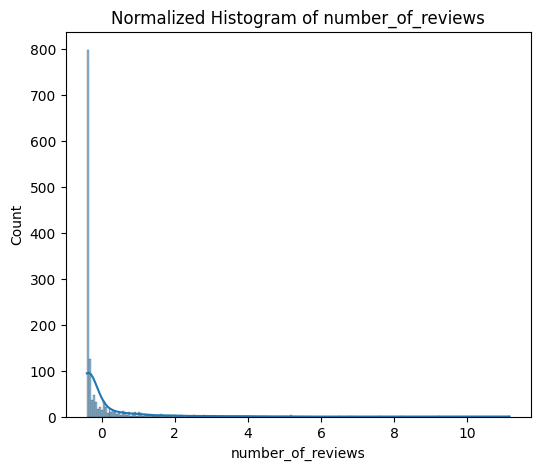

<Figure size 600x500 with 0 Axes>

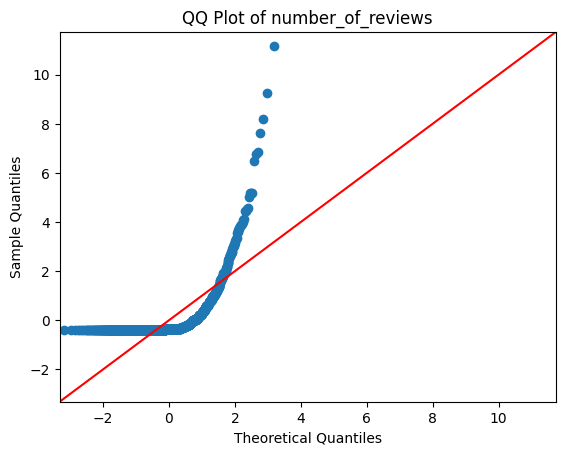

KS Test for number_of_reviews: Not Normal (p-value: 0.0000)
Testing reviews_per_month for Regular Data:


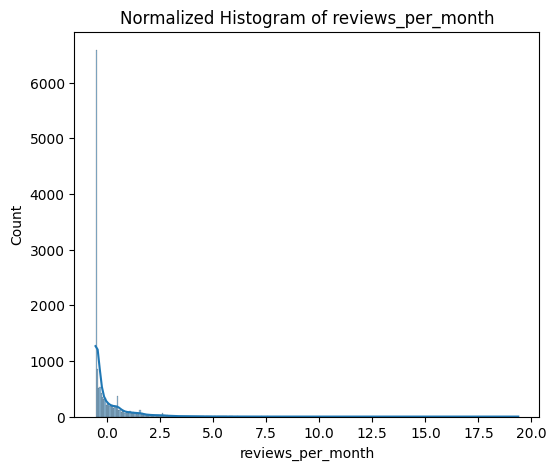

<Figure size 600x500 with 0 Axes>

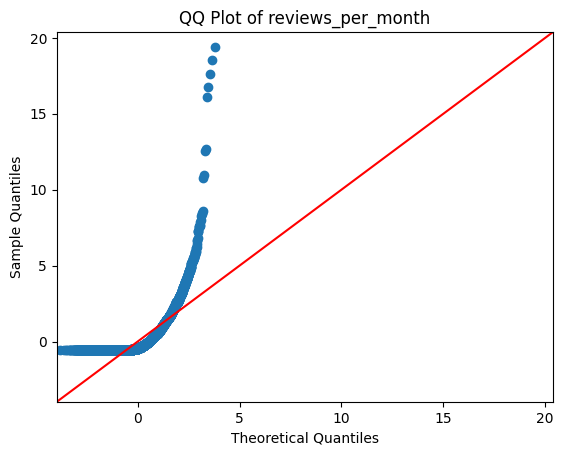

KS Test for reviews_per_month: Not Normal (p-value: 0.0000)
Testing reviews_per_month for Premium Data:


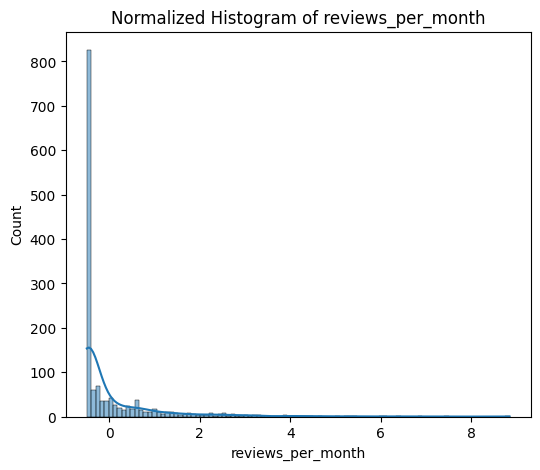

<Figure size 600x500 with 0 Axes>

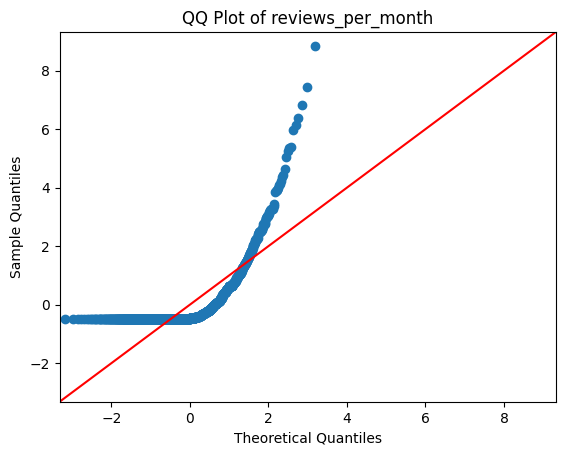

KS Test for reviews_per_month: Not Normal (p-value: 0.0000)
Testing calculated_host_listings_count for Regular Data:


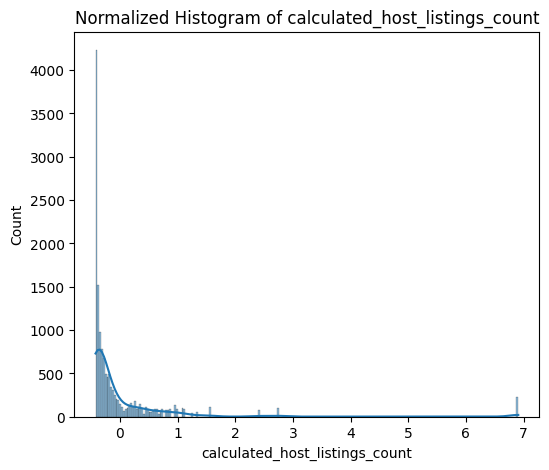

<Figure size 600x500 with 0 Axes>

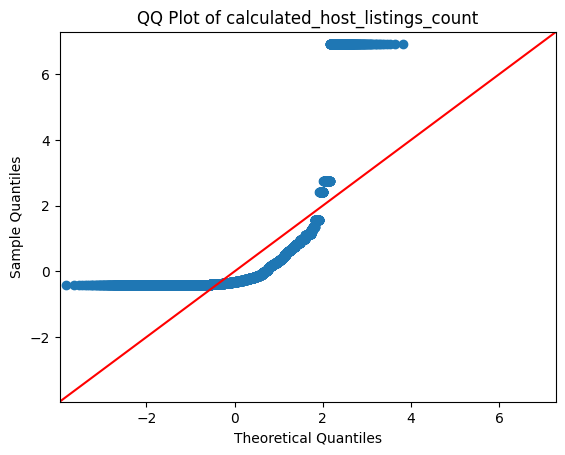

KS Test for calculated_host_listings_count: Not Normal (p-value: 0.0000)
Testing calculated_host_listings_count for Premium Data:


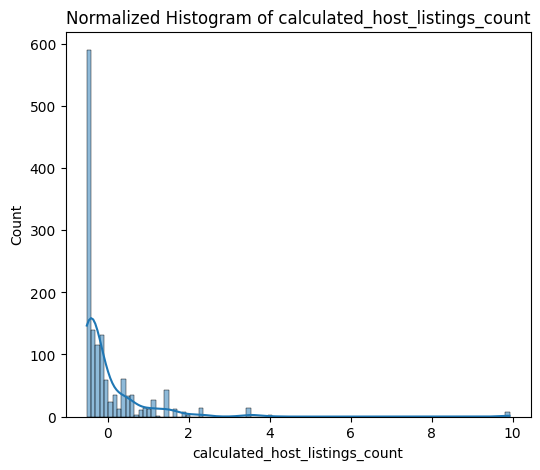

<Figure size 600x500 with 0 Axes>

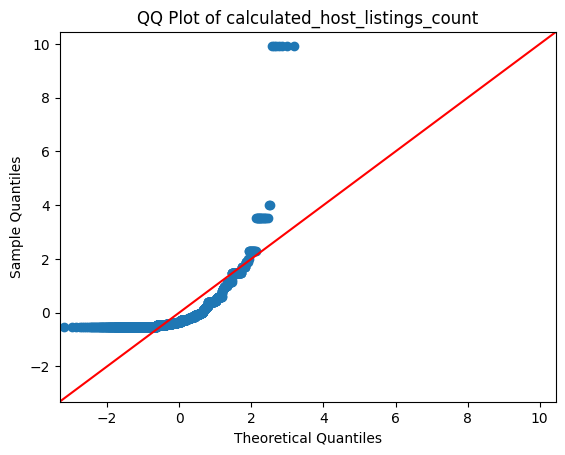

KS Test for calculated_host_listings_count: Not Normal (p-value: 0.0000)
Testing availability_365 for Regular Data:


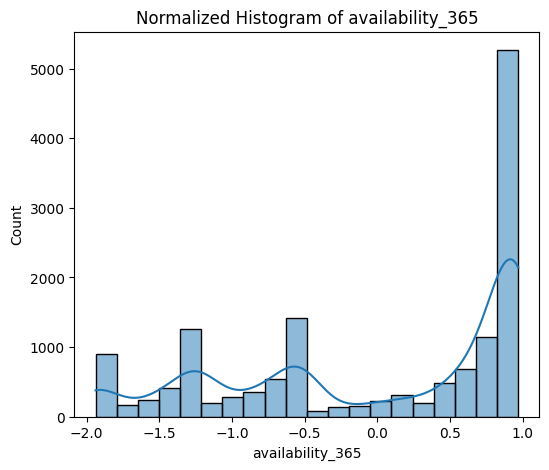

<Figure size 600x500 with 0 Axes>

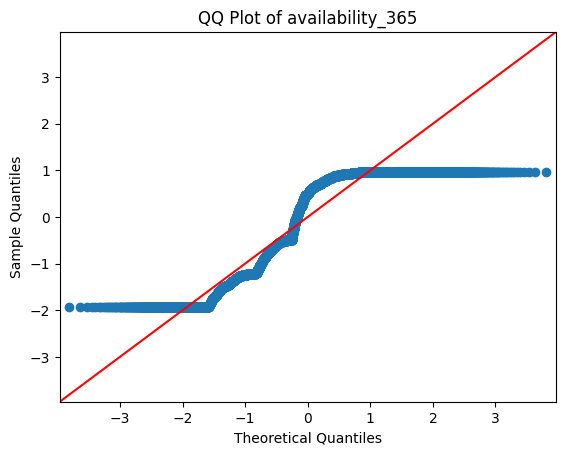

KS Test for availability_365: Not Normal (p-value: 0.0000)
Testing availability_365 for Premium Data:


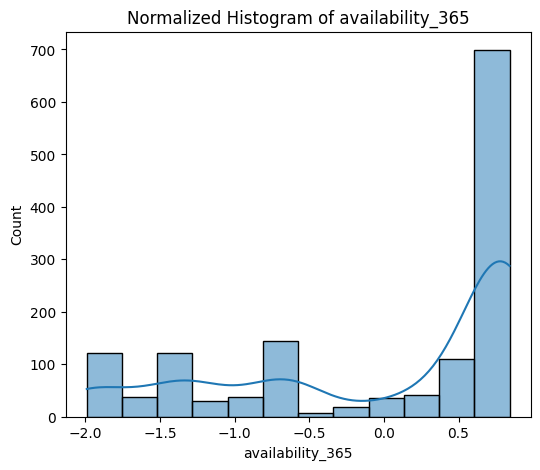

<Figure size 600x500 with 0 Axes>

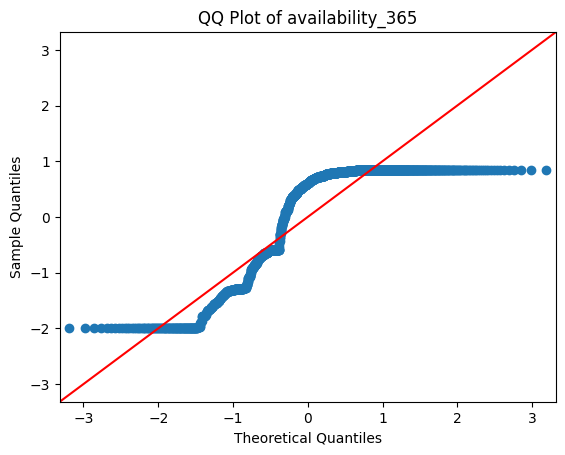

KS Test for availability_365: Not Normal (p-value: 0.0000)
Testing number_of_reviews_ltm for Regular Data:


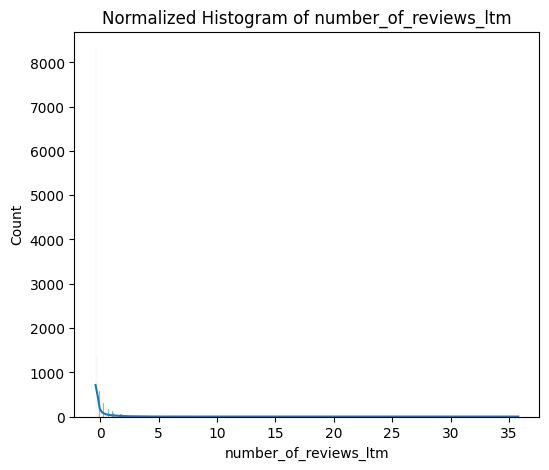

<Figure size 600x500 with 0 Axes>

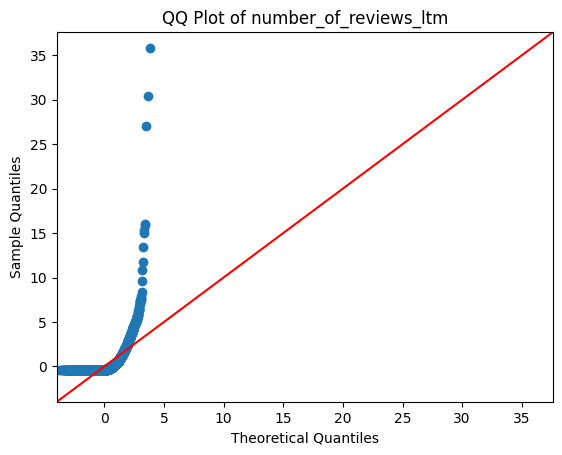

KS Test for number_of_reviews_ltm: Not Normal (p-value: 0.0000)
Testing number_of_reviews_ltm for Premium Data:


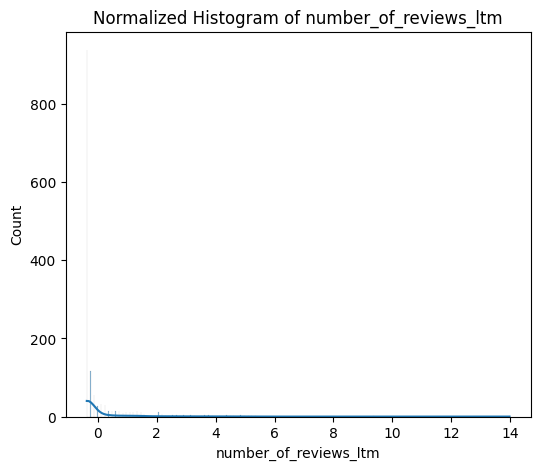

<Figure size 600x500 with 0 Axes>

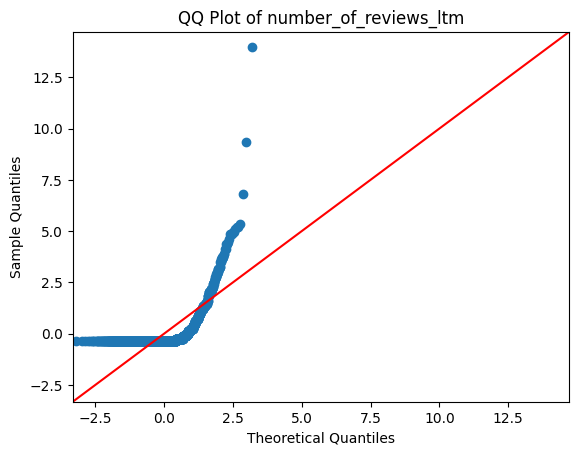

KS Test for number_of_reviews_ltm: Not Normal (p-value: 0.0000)


In [88]:
# Membuat Fungsi KS serta visualisasinya dengan histogram dan QQ Plot 
def ks_test_and_plot(data, column_name):
    # Normalisasi data dan lakukan KS test
    data_normalized = (data[column_name] - data[column_name].mean()) / data[column_name].std()
    stat, p_value = kstest(data_normalized, 'norm')
    normal = p_value > 0.05  # Threshold 0.05

    # Plot histogram
    plt.figure(figsize=(6, 5))  # Mengatur ukuran figure untuk histogram
    sns.histplot(data_normalized, kde=True)
    plt.title(f'Normalized Histogram of {column_name}')
    plt.show()

    # Plot QQ plot
    plt.figure(figsize=(6, 5))  # Mengatur ukuran figure untuk QQ plot
    sm.qqplot(data_normalized, line='45')
    plt.title(f'QQ Plot of {column_name}')
    plt.show()

    # Output KS test
    print(f'KS Test for {column_name}: {"Normal" if normal else "Not Normal"} (p-value: {p_value:.4f})')
    
    return normal

# List of variables to test
variables_to_test = ['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']

# Dictionary to hold KS test results
ks_results_regular = {}
ks_results_premium = {}

# Loop through each variable and perform the KS test and plots
for var in variables_to_test:
    print(f"Testing {var} for Regular Data:")
    ks_results_regular[var] = ks_test_and_plot(data_reguler, var)
    print(f"Testing {var} for Premium Data:")
    ks_results_premium[var] = ks_test_and_plot(data_premium, var)


Dari hasil uji Kolmogorov-Smirnov, kita dapat memastikan bahwa baik data reguler maupun premium menunjukkan distribusi yang tidak normal untuk semua variabel yang diuji. Hal ini mendukung penggunaan teknik analisis non-parametrik untuk menghindari bias dan kesalahan yang mungkin terjadi akibat asumsi distribusi normal.

##### Analisis Korelasi Spearman untuk Variable Numerik

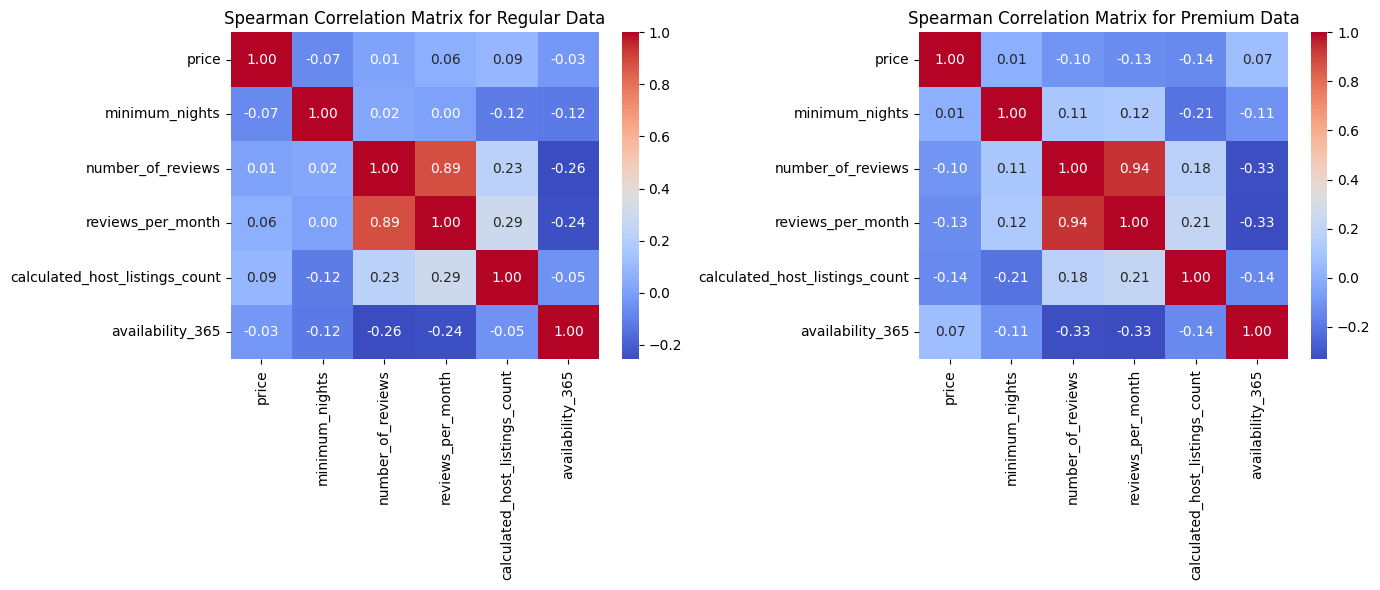

In [89]:
# Menghitung korelasi Spearman untuk data reguler dan premium
spearman_corr_regular = data_reguler[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                                      'calculated_host_listings_count', 'availability_365']].corr(method='spearman')
spearman_corr_premium = data_premium[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                                      'calculated_host_listings_count', 'availability_365']].corr(method='spearman')

# Visualisasi matriks korelasi Spearman
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(spearman_corr_regular, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix for Regular Data')

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_premium, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix for Premium Data')

plt.tight_layout()
plt.show()


Analisis korelasi Spearman untuk kedua dataset, reguler dan premium, memberikan kita wawasan tentang hubungan antara harga dan variabel lainnya dalam bentuk non-parametrik yang tidak memerlukan distribusi data normal. Mari kita ulas penjelasan yang lebih rinci:

### Korelasi Spearman pada Data Reguler
- **Minimum Nights**: Korelasi negatif yang rendah dengan harga menunjukkan bahwa peningkatan jumlah malam minimum yang diperlukan cenderung sedikit mengurangi harga, meskipun pengaruhnya tidak kuat.
- **Number of Reviews dan Reviews per Month**: Korelasi negatif yang rendah dengan harga menunjukkan bahwa properti dengan ulasan yang lebih banyak tidak secara signifikan berharga lebih rendah, namun ada kecenderungan kecil bahwa lebih banyak ulasan mungkin berkorelasi dengan harga yang sedikit lebih rendah.
- **Calculated Host Listings Count**: Korelasi positif rendah dengan harga mengindikasikan bahwa host yang memiliki lebih banyak properti cenderung menetapkan harga yang sedikit lebih tinggi, mungkin karena pengalaman atau kualitas layanan yang lebih konsisten.
- **Availability 365**: Korelasi positif yang rendah menunjukkan bahwa properti dengan ketersediaan yang lebih tinggi sepanjang tahun cenderung memiliki harga yang sedikit lebih tinggi. Ini bisa karena properti tersebut lebih populer atau memiliki permintaan yang lebih tinggi.

### Korelasi Spearman pada Data Premium
- **Minimum Nights, Number of Reviews, dan Reviews per Month**: Pola korelasi serupa dengan data reguler, dengan korelasi negatif rendah terhadap harga. Ini menunjukkan bahwa di segmen premium, properti dengan permintaan lebih tinggi (misalnya, lebih banyak ulasan) tidak secara signifikan menetapkan harga lebih tinggi.
- **Calculated Host Listings Count**: Mirip dengan data reguler, ada korelasi positif rendah, menunjukkan bahwa host dengan banyak properti mungkin sedikit menetapkan harga lebih tinggi di segmen premium.
- **Availability 365**: Juga menunjukkan korelasi positif rendah dengan harga, menegaskan bahwa properti yang lebih sering tersedia mungkin dihargai lebih tinggi.

##### Kesimpulan
Secara keseluruhan, hubungan antara harga dan variabel yang diuji cenderung lemah dalam kedua dataset. Ini menunjukkan bahwa faktor lain mungkin lebih penting dalam menentukan harga sewa properti Airbnb, atau mungkin ada kompleksitas yang tidak terungkap dengan analisis korelasi sederhana. Hubungan yang diamati cenderung serupa di antara kedua segmen, menunjukkan bahwa dinamika pasar mungkin konsisten antara kategori reguler dan premium, meskipun dengan intensitas yang berbeda.

Selanjutnya kita akan uji Kruskal-Wallis untuk variable kategorikal. Uji ini cocok untuk data yang tidak berdistribusi normal.

In [90]:
from scipy.stats import kruskal

# Kruskal-Wallis Test untuk `room_type` pada data reguler
room_types_reg = [group["price"].values for name, group in data_reguler.groupby("room_type")]
kruskal_stat_reg, kruskal_p_reg = kruskal(*room_types_reg)

# Kruskal-Wallis Test untuk `room_type` pada data premium
room_types_prem = [group["price"].values for name, group in data_premium.groupby("room_type")]
kruskal_stat_prem, kruskal_p_prem = kruskal(*room_types_prem)

kruskal_stat_reg, kruskal_p_reg, kruskal_stat_prem, kruskal_p_prem


(1291.1385984902267,
 1.2319075617540814e-279,
 20.111575963122426,
 0.0001609402177362805)

##### Hasil Kruskal-Wallis Test untuk `room_type`

##### Data Reguler
- **Statistik Uji**: 1291.14
- **p-value**: Sangat kecil (approx. \(1.23 \times 10^{-279}\))
  
##### Data Premium
- **Statistik Uji**: 20.11
- **p-value**: 0.00016

##### Interpretasi
Pada kedua dataset, reguler dan premium, Kruskal-Wallis test menghasilkan p-value yang sangat kecil, yang menunjukkan bahwa kita dapat menolak hipotesis nol bahwa semua grup memiliki median harga yang sama. Ini menunjukkan adanya perbedaan yang signifikan dalam median harga antara berbagai tipe kamar di kedua dataset.

Yang selanjutnya untuk `neighbourhood`

In [91]:
# Kruskal-Wallis Test untuk `neighbourhood` pada data reguler
# Mengingat jumlah neighbourhood yang besar, kita akan fokus pada 10 neighbourhood teratas berdasarkan jumlah listing
top_neighbourhoods_reg = data_reguler['neighbourhood'].value_counts().nlargest(10).index
neighbourhood_groups_reg = [group["price"].values for name, group in data_reguler.groupby("neighbourhood") if name in top_neighbourhoods_reg]
kruskal_stat_reg_nh, kruskal_p_reg_nh = kruskal(*neighbourhood_groups_reg)

# Kruskal-Wallis Test untuk `neighbourhood` pada data premium
top_neighbourhoods_prem = data_premium['neighbourhood'].value_counts().nlargest(10).index
neighbourhood_groups_prem = [group["price"].values for name, group in data_premium.groupby("neighbourhood") if name in top_neighbourhoods_prem]
kruskal_stat_prem_nh, kruskal_p_prem_nh = kruskal(*neighbourhood_groups_prem)

kruskal_stat_reg_nh, kruskal_p_reg_nh, kruskal_stat_prem_nh, kruskal_p_prem_nh

# Menentukan Hipotesis untuk harga reguler 
if kruskal_p_reg_nh <=0.05:
    print('Harga Reguler')
    print('Tolak Ho')
else:
    print('Harga Reguler')
    print('Gagal menolak Ho')

# Menentukan Hipotesis untuk harga premium 
if kruskal_p_prem_nh <=0.05:
    print('Harga Premium')
    print('Tolak Ho')
else:
    print('Harga Premium')
    print('Gagal menolak Ho')

Harga Reguler
Tolak Ho
Harga Premium
Tolak Ho


##### Hasil Kruskal-Wallis Test untuk `neighbourhood`

##### Data Reguler
- **Statistik Uji**: 774.95
- **p-value**: Sangat kecil (approx. \(5.24 \times 10^{-161}\))
  
Hasil ini menunjukkan bahwa ada perbedaan median harga yang sangat signifikan antar neighbourhood yang berbeda dalam dataset reguler. Nilai statistik uji yang tinggi mengindikasikan bahwa perbedaan antar grup (neighbourhood) cukup besar, dan p-value yang sangat kecil menunjukkan bahwa kita dapat dengan sangat yakin menolak hipotesis nol (hipotesis bahwa tidak ada perbedaan median antar neighbourhood).

##### Data Premium
- **Statistik Uji**: 34.94
- **p-value**: 0.000061

Dalam dataset premium, hasilnya juga menunjukkan adanya perbedaan median harga yang signifikan antar neighbourhood, meskipun nilai statistik uji lebih rendah dibandingkan dengan dataset reguler. Ini menunjukkan bahwa sementara perbedaan median harga masih signifikan, variabilitas atau rentang perbedaan harga antar neighbourhood mungkin tidak sebesar yang ditemukan dalam dataset reguler. Namun, p-value yang sangat kecil masih menunjukkan tingkat kepercayaan yang tinggi dalam menolak hipotesis nol.

##### Interpretasi
Pada kedua dataset, Kruskal-Wallis test menghasilkan p-value yang sangat kecil, yang menunjukkan bahwa kita dapat menolak hipotesis nol bahwa semua grup (neighbourhood teratas) memiliki median harga yang sama. Ini menunjukkan adanya perbedaan yang signifikan dalam median harga antara berbagai neighbourhood dalam kedua dataset.

## **KESIMPULAN DAN REKOMENDASI**

### Kesimpulan Analisis

Dari analisis yang dilakukan, kita telah mengidentifikasi beberapa aspek kunci yang mempengaruhi harga sewa properti Airbnb:

1. **Variabel Kategorikal (`room_type` dan `neighbourhood`)**:
   - **Room Type**: Ada perbedaan harga yang signifikan antara berbagai tipe kamar di kedua dataset (reguler dan premium), dengan p-value yang sangat kecil, menunjukkan kepercayaan yang tinggi dalam hasil ini. Hal ini menunjukkan bahwa tipe kamar adalah faktor penting dalam menentukan harga.
   - **Neighbourhood**: Sama seperti tipe kamar, lokasi atau neighbourhood juga menunjukkan perbedaan yang signifikan dalam harga di kedua dataset. Ini menunjukkan bahwa lokasi adalah salah satu faktor utama yang mempengaruhi harga sewa.

2. **Pengaruh Variabel Numerik**:
   - Analisis korelasi Spearman menunjukkan bahwa hubungan antara variabel numerik (seperti `number_of_reviews`, `availability_365`, dan lainnya) dengan harga cenderung lemah. Ini menunjukkan bahwa sementara faktor-faktor ini mungkin memiliki beberapa pengaruh, mereka tidak sekuat pengaruh tipe kamar dan lokasi.
   - Analisis Kruskal-Wallis ini menunjukkan bahwa p-value yang kecil yaitu kurang dari 0.05 yang menunjukkan menolak H0. Sehingga bisa diartikan bahwa terdapat perbedaan diantara kelompok kelompok yang di analisis yaitu neighbourhood dan room_type. 

### Rekomendasi

#### Untuk Pengelola Properti atau Investor Airbnb:
- **Penyesuaian Harga Berdasarkan Tipe Kamar dan Lokasi**: Mengingat bahwa tipe kamar dan lokasi sangat mempengaruhi harga, pengelola properti harus menyesuaikan harga sewa berdasarkan faktor-faktor ini untuk memaksimalkan pendapatan. Menawarkan harga yang kompetitif untuk tipe kamar yang sama di lokasi serupa dapat membantu meningkatkan okupansi.
- **Investasi Berdasarkan Lokasi**: Dalam memilih properti untuk investasi atau pengembangan lebih lanjut, pertimbangkan lokasi sebagai faktor utama. Neighbourhood yang menunjukkan harga sewa lebih tinggi bisa menjadi target investasi yang menarik.

#### Untuk Pembuat Kebijakan atau Peneliti:
- **Pengembangan Infrastruktur dan Layanan**: Mengingat pengaruh signifikan lokasi terhadap harga sewa, pembuat kebijakan lokal dapat fokus pada peningkatan infrastruktur dan layanan di neighbourhood yang lebih rendah harganya untuk meningkatkan daya tarik dan mungkin kesetaraan harga sewa.
- **Analisis Lebih Lanjut pada Faktor Lingkungan**: Melakukan studi lebih lanjut mengenai bagaimana berbagai faktor lingkungan (seperti keamanan, kebersihan, akses ke transportasi) mempengaruhi harga sewa dapat membantu dalam perencanaan kebijakan yang lebih efektif.

#### Untuk Pengguna atau Wisatawan:
- **Pilihan Berdasarkan Budget**: Wisatawan dan pengguna Airbnb dapat menggunakan informasi ini untuk membuat keputusan yang lebih baik dalam memilih akomodasi yang sesuai dengan budget mereka, dengan mempertimbangkan betapa signifikannya perbedaan harga antara berbagai tipe kamar dan lokasi.